## **Import librairies**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importation des differentes librairies
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

pd.set_option("display.max_columns", 999)

## **Load data**

In [3]:
# Load data

path_dir = f"/content/drive/MyDrive/Colab Notebooks/Dataset/flights_sample_3m.csv"

df = pd.read_csv(path_dir)

display(df.head(5))

FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  TAXI_OUT  \
0             Newark, NJ          1155    1151.0       -4.0      19.0   
1            Seattle, WA          2120    2114.0       -6.0       9.0   
2        Minneapolis, MN           954    1000.0        6.0      20.0   
3      San Francisco, CA          1609    1608.0       -1.0      27.0   
4  Dallas/Fort Worth, TX          1840    1838.0       -2.0      15.0   

   WHEELS_OFF  WHEELS_ON  TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  \
0      1210.0     1443.0      4.0          1501    1447.0      -14.0   
1      2123.0     2232.0     38.0          2315    2310.0       -5.0   
2      1020.0     1247.0      5.0          1252    1252.0        0.0   
3      1635.0     1844.0      9.0          1829    1853.0       24.0   
4      1853.0     2026.0     14.0          2041    2040.0       -1.0   

   CANCELLED CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0        0.0               NaN       0.0             186.0         176.0   
1        0.0               NaN       0.0             235.0         236.0   
2        0.0               NaN       0.0             118.0         112.0   
3        0.0               NaN       0.0             260.0         285.0   
4        0.0               NaN       0.0             181.0         182.0   

   AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
0     153.0    1065.0                NaN                NaN            NaN   
1     189.0    1399.0                NaN                NaN            NaN   
2      87.0     680.0                NaN                NaN            NaN   
3     249.0    1589.0                0.0                0.0           24.0   
4     153.0     985.0                NaN                NaN            NaN   

   DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
0                 NaN                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      0.0  
4                 NaN                      NaN

## **Explanatory Data Analysis**

##### **Cancellation Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [ ]:
# Data information

## columns
cols = df.columns
print(f"The different columns/features :\n{ list(cols) }\n")

## shape of data
shape_df = df.shape
print(f"The shape of data :\n{ shape_df }\n")

## unique values
print(f"Unique Values per colonnes : \n")
display(df.nunique())

# NaNs values
print(f"\nNans Values Proportion :")
Nans_values = pd.DataFrame( [ df.isna().sum() , (df.isna().sum() / len(df))*100 ] , index = [ "# Nans" , "% Nans" ]  )
Nans_values = Nans_values.T
display(Nans_values)

## Statistics
print(f"The Statistics of the dataset: ")
display(df.describe())

The different columns/features :
['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

The shape of data :
(3000000, 32)

Unique Values per colonnes : 



FL_DATE                    1704
AIRLINE                      18
AIRLINE_DOT                  18
AIRLINE_CODE                 18
DOT_CODE                     18
FL_NUMBER                  7111
ORIGIN                      380
ORIGIN_CITY                 373
DEST                        380
DEST_CITY                   373
CRS_DEP_TIME               1384
DEP_TIME                   1440
DEP_DELAY                  1513
TAXI_OUT                    179
WHEELS_OFF                 1440
WHEELS_ON                  1440
TAXI_IN                     202
CRS_ARR_TIME               1435
ARR_TIME                   1440
ARR_DELAY                  1527
CANCELLED                     2
CANCELLATION_CODE             4
DIVERTED                      2
CRS_ELAPSED_TIME            640
ELAPSED_TIME                696
AIR_TIME                    666
DISTANCE                   1727
DELAY_DUE_CARRIER          1291
DELAY_DUE_WEATHER           812
DELAY_DUE_NAS               671
DELAY_DUE_SECURITY          172
DELAY_DU


Nans Values Proportion :


# Nans     % Nans
FL_DATE                        0.0   0.000000
AIRLINE                        0.0   0.000000
AIRLINE_DOT                    0.0   0.000000
AIRLINE_CODE                   0.0   0.000000
DOT_CODE                       0.0   0.000000
FL_NUMBER                      0.0   0.000000
ORIGIN                         0.0   0.000000
ORIGIN_CITY                    0.0   0.000000
DEST                           0.0   0.000000
DEST_CITY                      0.0   0.000000
CRS_DEP_TIME                   0.0   0.000000
DEP_TIME                   77615.0   2.587167
DEP_DELAY                  77644.0   2.588133
TAXI_OUT                   78806.0   2.626867
WHEELS_OFF                 78806.0   2.626867
WHEELS_ON                  79944.0   2.664800
TAXI_IN                    79944.0   2.664800
CRS_ARR_TIME                   0.0   0.000000
ARR_TIME                   79942.0   2.664733
ARR_DELAY                  86198.0   2.873267
CANCELLED                      0.0   0.000000
CANCELLATION_CODE        2920860.0  97.362000
DIVERTED                       0.0   0.000000
CRS_ELAPSED_TIME              14.0   0.000467
ELAPSED_TIME               86198.0   2.873267
AIR_TIME                   86198.0   2.873267
DISTANCE                       0.0   0.000000
DELAY_DUE_CARRIER        2466137.0  82.204567
DELAY_DUE_WEATHER        2466137.0  82.204567
DELAY_DUE_NAS            2466137.0  82.204567
DELAY_DUE_SECURITY       2466137.0  82.204567
DELAY_DUE_LATE_AIRCRAFT  2466137.0  82.204567

The Statistics of the dataset: 


DOT_CODE     FL_NUMBER  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count  3.000000e+06  3.000000e+06  3.000000e+06  2.922385e+06  2.922356e+06   
mean   1.997629e+04  2.511536e+03  1.327062e+03  1.329776e+03  1.012333e+01   
std    3.772846e+02  1.747258e+03  4.858789e+02  4.993101e+02  4.925183e+01   
min    1.939300e+04  1.000000e+00  1.000000e+00  1.000000e+00 -9.000000e+01   
25%    1.979000e+04  1.051000e+03  9.150000e+02  9.160000e+02 -6.000000e+00   
50%    1.993000e+04  2.152000e+03  1.320000e+03  1.323000e+03 -2.000000e+00   
75%    2.036800e+04  3.797000e+03  1.730000e+03  1.739000e+03  6.000000e+00   
max    2.045200e+04  9.562000e+03  2.359000e+03  2.400000e+03  2.966000e+03   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  2.921194e+06  2.921194e+06  2.920056e+06  2.920056e+06  3.000000e+06   
mean   1.664305e+01  1.352361e+03  1.462500e+03  7.678982e+00  1.490561e+03   
std    9.192901e+00  5.008727e+02  5.272368e+02  6.269639e+00  5.115476e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.100000e+01  9.310000e+02  1.049000e+03  4.000000e+00  1.107000e+03   
50%    1.400000e+01  1.336000e+03  1.501000e+03  6.000000e+00  1.516000e+03   
75%    1.900000e+01  1.752000e+03  1.908000e+03  9.000000e+00  1.919000e+03   
max    1.840000e+02  2.400000e+03  2.400000e+03  2.490000e+02  2.400000e+03   

           ARR_TIME     ARR_DELAY     CANCELLED      DIVERTED  \
count  2.920058e+06  2.913802e+06  3.000000e+06  3.000000e+06   
mean   1.466511e+03  4.260858e+00  2.638000e-02  2.352000e-03   
std    5.318383e+02  5.117482e+01  1.602626e-01  4.844036e-02   
min    1.000000e+00 -9.600000e+01  0.000000e+00  0.000000e+00   
25%    1.053000e+03 -1.600000e+01  0.000000e+00  0.000000e+00   
50%    1.505000e+03 -7.000000e+00  0.000000e+00  0.000000e+00   
75%    1.913000e+03  7.000000e+00  0.000000e+00  0.000000e+00   
max    2.400000e+03  2.934000e+03  1.000000e+00  1.000000e+00   

       CRS_ELAPSED_TIME  ELAPSED_TIME      AIR_TIME      DISTANCE  \
count      2.999986e+06  2.913802e+06  2.913802e+06  3.000000e+06   
mean       1.422758e+02  1.366205e+02  1.123108e+02  8.093616e+02   
std        7.155669e+01  7.167582e+01  6.975484e+01  5.878939e+02   
min        1.000000e+00  1.500000e+01  8.000000e+00  2.900000e+01   
25%        9.000000e+01  8.400000e+01  6.100000e+01  3.770000e+02   
50%        1.250000e+02  1.200000e+02  9.500000e+01  6.510000e+02   
75%        1.720000e+02  1.670000e+02  1.420000e+02  1.046000e+03   
max        7.050000e+02  7.390000e+02  6.920000e+02  5.812000e+03   

       DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count      533863.000000      533863.000000  533863.000000   
mean           24.759086           3.985260      13.164728   
std            71.771845          32.410796      33.161122   
min             0.000000           0.000000       0.000000   
25%             0.000000           0.000000       0.000000   
50%             4.000000           0.000000       0.000000   
75%            23.000000           0.000000      17.000000   
max          2934.000000        1653.000000    1741.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
count       533863.000000            533863.000000  
mean             0.145931                25.471282  
std              3.582053                55.766892  
min              0.000000                 0.000000  
25%              0.000000                 0.000000  
50%              0.000000                 0.000000  
75%              0.000000                30.000000  
max           1185.000000              2557.000000

The number of occurrences of different classes :
0.0    2920860
1.0      79140
Name: CANCELLED, dtype: int64 

which means in %:
0.0    97.362
1.0     2.638
Name: CANCELLED, dtype: float64 


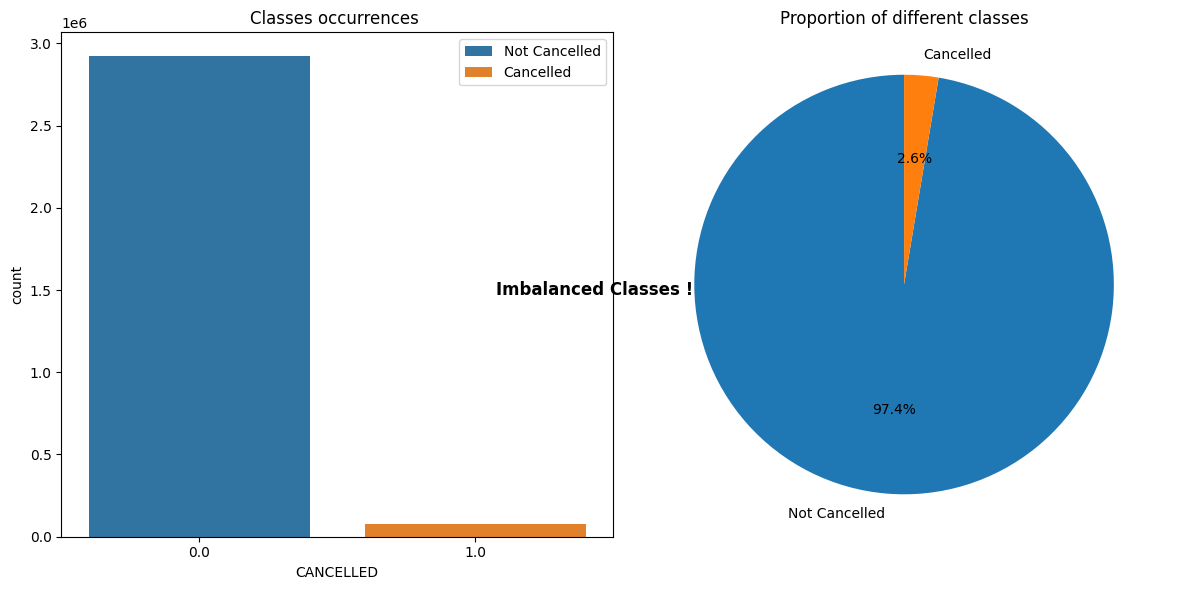

In [ ]:
## Output Analysis
print(f"The number of occurrences of different classes :\n{df['CANCELLED'].value_counts()} \n\nwhich means in %:\n{(df['CANCELLED'].value_counts())/len(df)*100} ")

# subplot parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# first subplot
sns.countplot(data=df, x='CANCELLED', hue='CANCELLED', ax=axes[0])
axes[0].set_title('Classes occurrences ')
axes[0].legend(['Not Cancelled', 'Cancelled'])

# second subplot
cancelled_counts = df['CANCELLED'].value_counts()
axes[1].pie(cancelled_counts, labels=['Not Cancelled', 'Cancelled'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proportion of different classes')
axes[1].axis('equal')

plt.gcf().text(0.5, 0.5, 'Imbalanced Classes !', ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df['date_column'] = pd.to_datetime(df['FL_DATE'])

df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df['day'] = df['date_column'].dt.day

cancellation_per_airline_companies = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["month"],
                                        aggfunc="sum" )["CANCELLED"]

<ipython-input-7-1ebd148a9aa6>:7: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  cancellation_per_airline_companies = df.pivot_table(


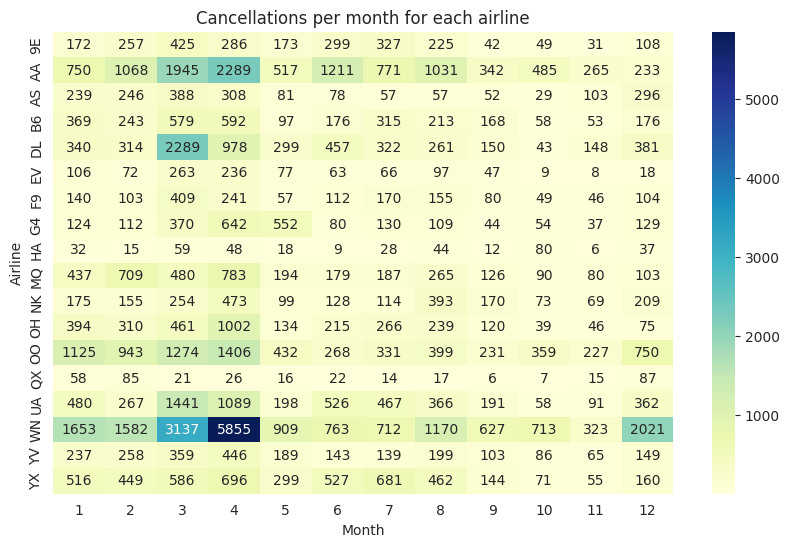

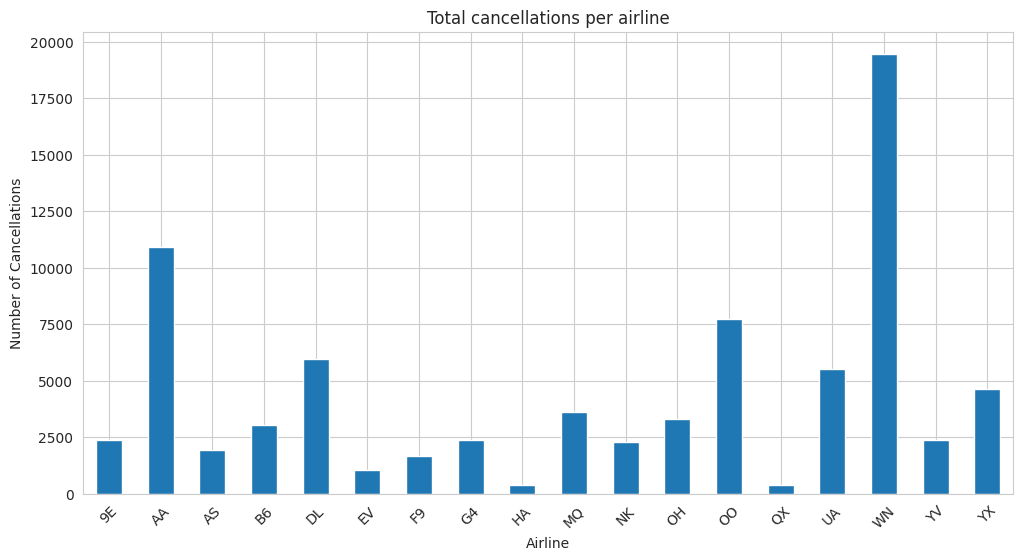

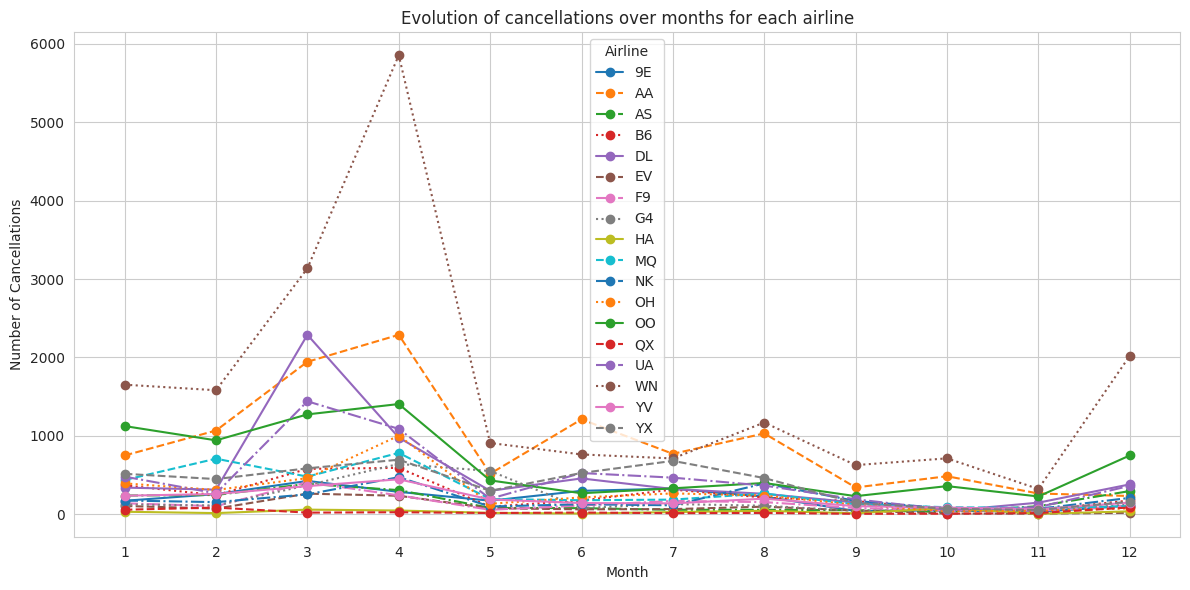

In [ ]:

# Set grid style
sns.set_style("whitegrid")

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cancellation_per_airline_companies, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Cancellations per month for each airline")
plt.xlabel("Month")
plt.ylabel("Airline")
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
cancellation_per_airline_companies.sum(axis=1).plot(kind="bar")
plt.title("Total cancellations per airline")
plt.xlabel("Airline")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.show()

# Determine the number of unique airlines
num_airlines = cancellation_per_airline_companies.shape[0]

# Define colors and line styles using Seaborn's palettes
colors = sns.color_palette("tab10", n_colors=num_airlines)
line_styles = ['-', '--', '-.', ':']

# Line Plot
plt.figure(figsize=(12, 6))

# Plot lines for each airline
for i, airline in enumerate(cancellation_per_airline_companies.index):
    plt.plot(cancellation_per_airline_companies.columns, cancellation_per_airline_companies.loc[airline],
             marker='o', linestyle=line_styles[i%len(line_styles)], color=colors[i],
             label=airline)

plt.title("Evolution of cancellations over months for each airline")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(range(1, 13))
plt.legend(title="Airline")
plt.grid(True)  # Add grid
plt.tight_layout()  # Adjust plot to avoid overlapping labels
plt.show()





In [ ]:
corr = df.corr()['CANCELLED']
corr



<ipython-input-9-5ec749c10774>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['CANCELLED']


DOT_CODE                  -0.003576
FL_NUMBER                  0.011324
CRS_DEP_TIME               0.011832
DEP_TIME                   0.007799
DEP_DELAY                  0.024757
TAXI_OUT                   0.005974
WHEELS_OFF                 0.004101
WHEELS_ON                       NaN
TAXI_IN                         NaN
CRS_ARR_TIME               0.006653
ARR_TIME                        NaN
ARR_DELAY                       NaN
CANCELLED                  1.000000
DIVERTED                  -0.007992
CRS_ELAPSED_TIME          -0.015436
ELAPSED_TIME                    NaN
AIR_TIME                        NaN
DISTANCE                  -0.017814
DELAY_DUE_CARRIER               NaN
DELAY_DUE_WEATHER               NaN
DELAY_DUE_NAS                   NaN
DELAY_DUE_SECURITY              NaN
DELAY_DUE_LATE_AIRCRAFT         NaN
year                      -0.017435
month                     -0.057367
day                        0.017584
Name: CANCELLED, dtype: float64

In [ ]:
# sns.pairplot(df, hue="CANCELLED", corner=True)

In [ ]:
cancellation_per_airline_companies_per_origin = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["ORIGIN"],
                                        aggfunc="sum" )["CANCELLED"]
cancellation_per_airline_companies_per_origin

<ipython-input-11-b98ca9511012>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  cancellation_per_airline_companies_per_origin = df.pivot_table(


ORIGIN         ABE   ABI    ABQ  ABR  ABY   ACK   ACT   ACV   ACY  ADK   ADQ  \
AIRLINE_CODE                                                                   
9E             5.0   NaN    NaN  NaN  1.0   3.0   NaN   NaN   NaN  NaN   NaN   
AA             NaN   NaN   31.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
AS             NaN   NaN    3.0  NaN  NaN   NaN   NaN   NaN   NaN  0.0  20.0   
B6             NaN   NaN    7.0  NaN  NaN  19.0   NaN   NaN   NaN  NaN   NaN   
DL             2.0   NaN    6.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
EV             2.0   NaN    0.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
F9             NaN   NaN    1.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
G4            21.0   NaN    6.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
HA             NaN   NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
MQ             6.0  24.0    7.0  NaN  NaN   0.0  27.0   NaN   NaN  NaN   NaN   
NK             NaN   NaN    1.0  NaN  NaN   NaN   NaN   NaN  46.0  NaN   NaN   
OH            13.0   NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
OO             2.0   3.0   17.0  4.0  4.0   NaN   7.0  39.0   NaN  NaN   NaN   
QX             NaN   NaN    0.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
UA             NaN   NaN   17.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
WN             NaN   NaN  119.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
YV             NaN   NaN   16.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
YX             NaN   NaN    3.0  NaN  NaN   5.0   NaN   NaN   NaN  NaN   NaN   

ORIGIN         AEX   AGS  AKN   ALB   ALO  ALS  ALW   AMA    ANC  APN  ART  \
AIRLINE_CODE                                                                 
9E             8.0   9.0  NaN  10.0   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
AA             NaN   0.0  NaN  11.0   NaN  NaN  NaN   2.0    1.0  NaN  NaN   
AS             NaN   NaN  2.0   NaN   NaN  NaN  NaN   NaN  113.0  NaN  NaN   
B6             NaN   NaN  NaN  10.0   NaN  NaN  NaN   NaN    0.0  NaN  NaN   
DL             NaN   2.0  NaN   9.0   NaN  NaN  NaN   NaN    8.0  NaN  NaN   
EV             4.0   NaN  NaN   0.0   NaN  NaN  NaN   5.0    NaN  NaN  NaN   
F9             NaN   NaN  NaN   6.0   NaN  NaN  NaN   NaN    0.0  NaN  NaN   
G4             NaN   NaN  NaN   7.0   NaN  NaN  NaN   1.0    0.0  NaN  NaN   
HA             NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
MQ            22.0   4.0  NaN   6.0  16.0  NaN  NaN  15.0    NaN  NaN  NaN   
NK             NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
OH             0.0  22.0  NaN  17.0   NaN  NaN  NaN   NaN    NaN  NaN  3.0   
OO             0.0   1.0  NaN  13.0   NaN  6.0  0.0  13.0    NaN  7.0  NaN   
QX             NaN   NaN  5.0   NaN   NaN  NaN  6.0   NaN   23.0  NaN  NaN   
UA             NaN   NaN  NaN   4.0   NaN  NaN  NaN   NaN    5.0  NaN  NaN   
WN             NaN   NaN  NaN  75.0   NaN  NaN  NaN  36.0    NaN  NaN  NaN   
YV             NaN   3.0  NaN   0.0   NaN  NaN  NaN  27.0    NaN  NaN  NaN   
YX             NaN   0.0  NaN  10.0   NaN  NaN  NaN   NaN    NaN  NaN  NaN   

ORIGIN          ASE     ATL   ATW   ATY    AUS   AVL  AVP   AZA   AZO   BDL  \
AIRLINE_CODE                                                                  
9E              NaN   167.0   4.0   NaN    2.0  11.0  0.0   NaN   4.0   5.0   
AA              NaN   125.0   NaN   NaN  179.0   2.0  5.0   NaN   NaN  47.0   
AS              NaN     4.0   NaN   NaN   21.0   NaN  NaN   NaN   NaN   NaN   
B6              NaN    22.0   NaN   NaN   22.0   0.0  NaN   NaN   NaN  43.0   
DL              NaN  1292.0   2.0   NaN   61.0   4.0  2.0   NaN   NaN  24.0   
EV              NaN     7.0   NaN   NaN    0.0   0.0  1.0   NaN   0.0   2.0   
F9              NaN    74.0   NaN   NaN    7.0   NaN  NaN   NaN   NaN   8.0   
G4              NaN     NaN  13.0   NaN   24.0  61.0  NaN  74.0   NaN   NaN   
HA              NaN     NaN   NaN   NaN    0.0  

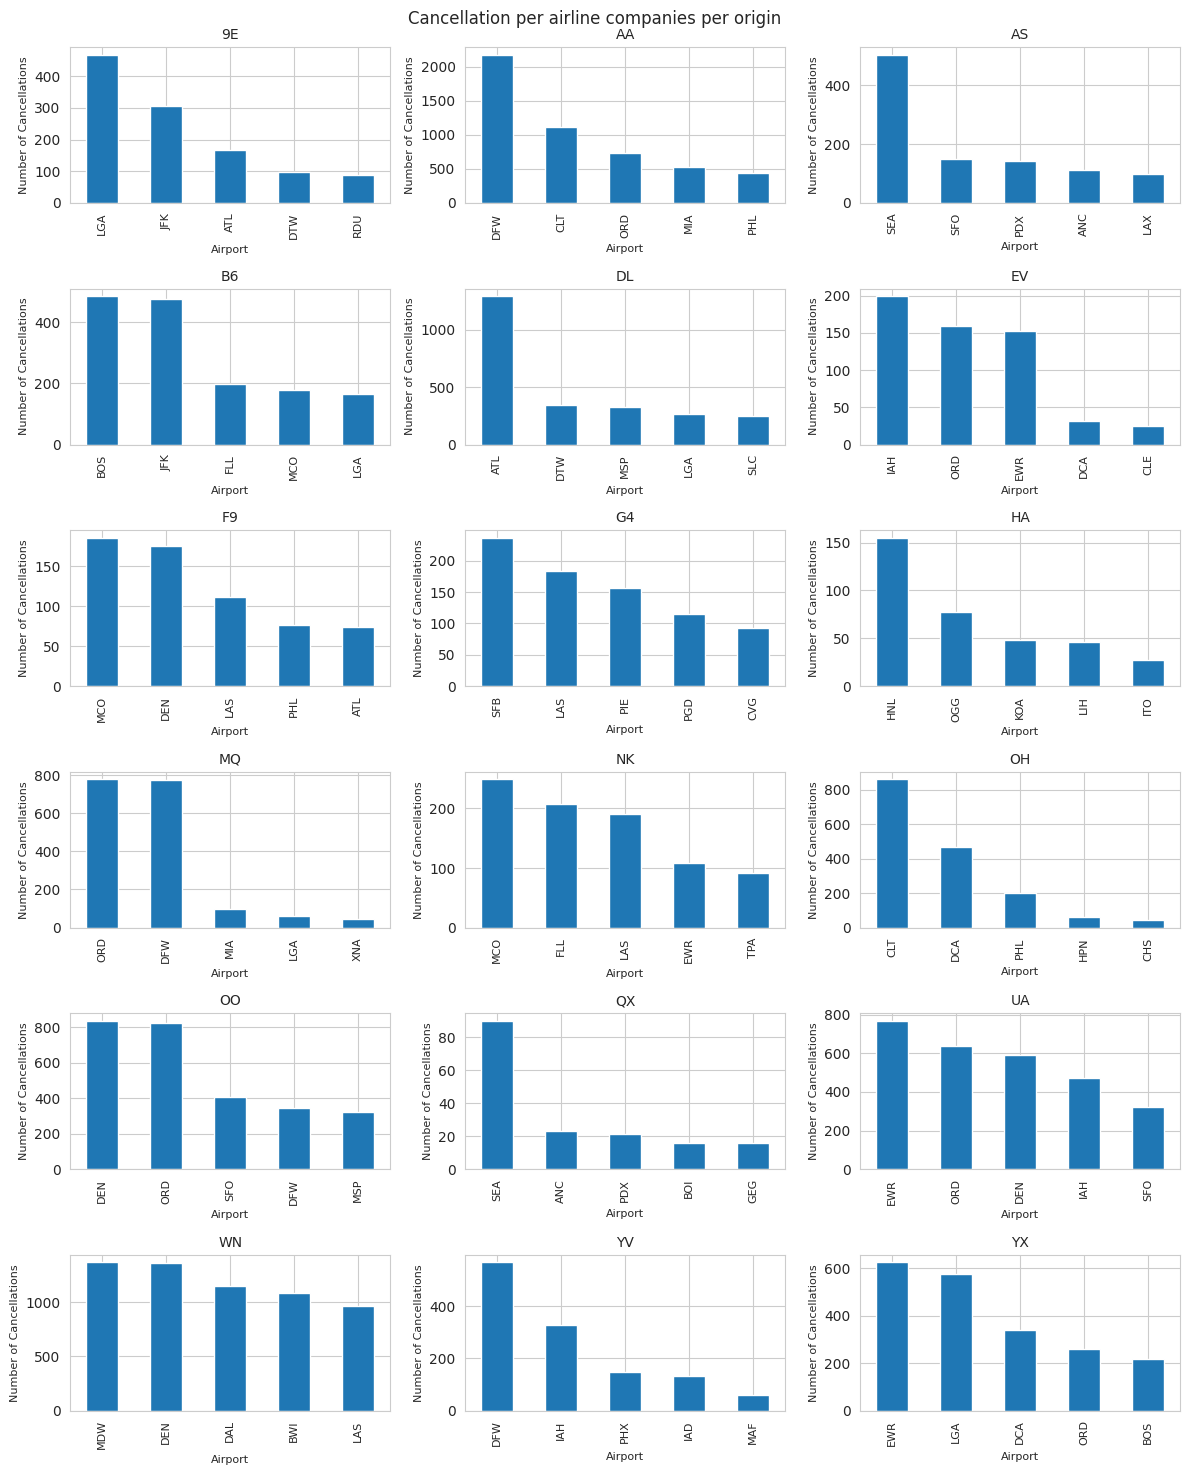

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Cancellation per airline companies per origin')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(cancellation_per_airline_companies_per_origin.index):
    # Sélection des cinq premières valeurs maximales
    top5 = cancellation_per_airline_companies_per_origin.loc[airline_code].nlargest(5)
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Number of Cancellations", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(cancellation_per_airline_companies_per_origin.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
cancellation_per_airline_companies_per_destination = df.pivot_table(
                                                    index="AIRLINE_CODE" ,
                                                    columns= ["DEST"],
                                                    aggfunc="sum" )["CANCELLED"]
cancellation_per_airline_companies_per_destination

<ipython-input-13-0c0412c3f220>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  cancellation_per_airline_companies_per_destination = df.pivot_table(


DEST           ABE   ABI    ABQ  ABR  ABY   ACK   ACT   ACV   ACY  ADK   ADQ  \
AIRLINE_CODE                                                                   
9E             0.0   NaN    NaN  NaN  1.0   1.0   NaN   NaN   NaN  NaN   NaN   
AA             NaN   NaN   30.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
AS             NaN   NaN    4.0  NaN  NaN   NaN   NaN   NaN   NaN  5.0  20.0   
B6             NaN   NaN    3.0  NaN  NaN  10.0   NaN   NaN   NaN  NaN   NaN   
DL             2.0   NaN    9.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
EV             3.0   NaN    2.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
F9             NaN   NaN    0.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
G4            33.0   NaN    8.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
HA             NaN   NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
MQ             5.0  23.0    9.0  NaN  NaN   0.0  14.0   NaN   NaN  NaN   NaN   
NK             NaN   NaN    1.0  NaN  NaN   NaN   NaN   NaN  44.0  NaN   NaN   
OH            15.0   NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
OO             3.0   1.0   18.0  5.0  1.0   NaN   8.0  36.0   NaN  NaN   NaN   
QX             NaN   NaN    0.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
UA             NaN   NaN    8.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
WN             NaN   NaN  101.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
YV             NaN   NaN   17.0  NaN  NaN   NaN   NaN   NaN   NaN  NaN   NaN   
YX             NaN   NaN    5.0  NaN  NaN   6.0   NaN   NaN   NaN  NaN   NaN   

DEST           AEX   AGS  AKN   ALB   ALO  ALS  ALW   AMA    ANC  APN  ART  \
AIRLINE_CODE                                                                 
9E             3.0   8.0  NaN  10.0   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
AA             NaN   0.0  NaN   7.0   NaN  NaN  NaN  12.0    1.0  NaN  NaN   
AS             NaN   NaN  2.0   NaN   NaN  NaN  NaN   NaN  119.0  NaN  NaN   
B6             NaN   NaN  NaN   7.0   NaN  NaN  NaN   NaN    0.0  NaN  NaN   
DL             NaN   0.0  NaN   5.0   NaN  NaN  NaN   NaN    8.0  NaN  NaN   
EV             1.0   NaN  NaN   3.0   NaN  NaN  NaN   4.0    NaN  NaN  NaN   
F9             NaN   NaN  NaN   4.0   NaN  NaN  NaN   NaN    0.0  NaN  NaN   
G4             NaN   NaN  NaN  13.0   NaN  NaN  NaN   4.0    1.0  NaN  NaN   
HA             NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
MQ            13.0   5.0  NaN   7.0  12.0  NaN  NaN  19.0    NaN  NaN  NaN   
NK             NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN    NaN  NaN  NaN   
OH             1.0  11.0  NaN  25.0   NaN  NaN  NaN   NaN    NaN  NaN  6.0   
OO             2.0   0.0  NaN  16.0   NaN  6.0  0.0  12.0    NaN  5.0  NaN   
QX             NaN   NaN  5.0   NaN   NaN  NaN  6.0   NaN   23.0  NaN  NaN   
UA             NaN   NaN  NaN   7.0   NaN  NaN  NaN   NaN    5.0  NaN  NaN   
WN             NaN   NaN  NaN  69.0   NaN  NaN  NaN  25.0    NaN  NaN  NaN   
YV             NaN   2.0  NaN   0.0   NaN  NaN  NaN  14.0    NaN  NaN  NaN   
YX             NaN   0.0  NaN   9.0   NaN  NaN  NaN   NaN    NaN  NaN  NaN   

DEST            ASE     ATL   ATW  ATY    AUS   AVL   AVP   AZA  AZO   BDL  \
AIRLINE_CODE                                                                 
9E              NaN   189.0  11.0  NaN    0.0   8.0   0.0   NaN  6.0   6.0   
AA              NaN    88.0   NaN  NaN  155.0   3.0   2.0   NaN  NaN  41.0   
AS              NaN     5.0   NaN  NaN   20.0   NaN   NaN   NaN  NaN   NaN   
B6              NaN    23.0   NaN  NaN   18.0   0.0   NaN   NaN  NaN  28.0   
DL              NaN  1383.0   3.0  NaN   54.0   3.0   1.0   NaN  NaN  23.0   
EV              NaN     5.0   NaN  NaN    0.0   0.0   0.0   NaN  1.0   0.0   
F9              NaN    53.0   NaN  NaN   12.0   NaN   NaN   NaN  NaN  11.0   
G4              NaN     NaN  25.0  NaN   15.0  76.0   NaN  90.0  NaN   NaN   
HA              NaN     NaN   NaN  NaN    0.0   NaN   NaN 

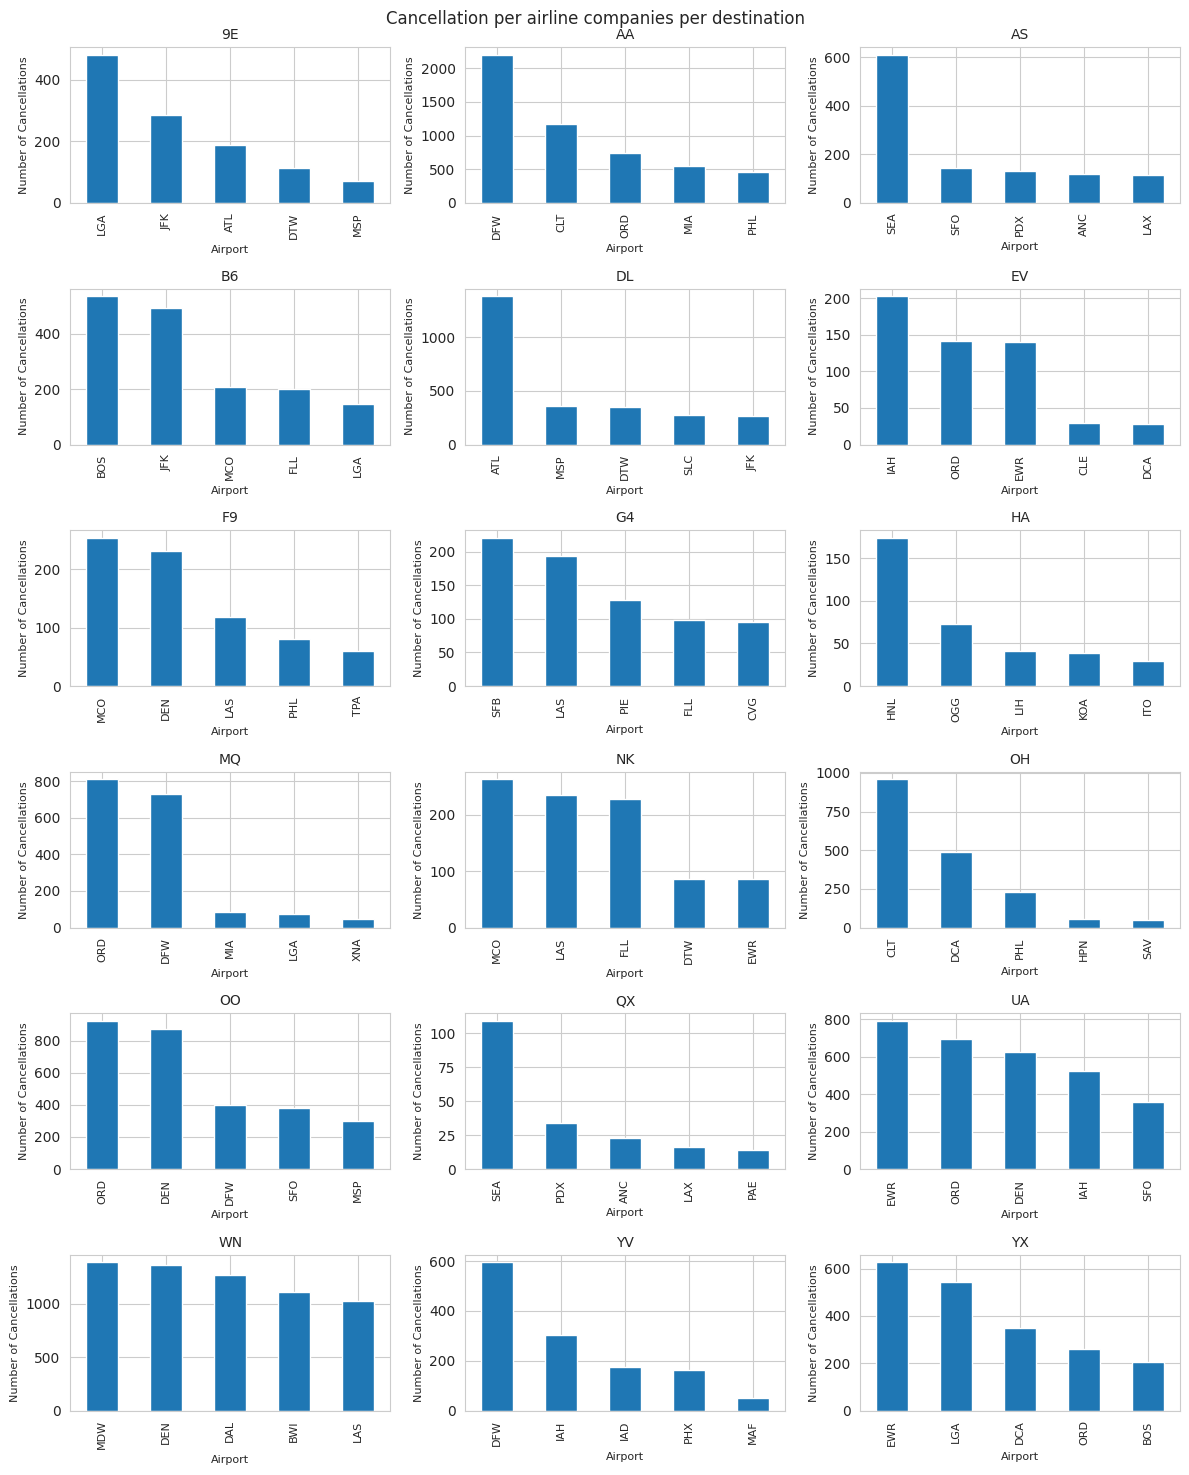

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Cancellation per airline companies per destination')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(cancellation_per_airline_companies_per_destination.index):
    # Sélection des cinq premières valeurs maximales
    top5 = cancellation_per_airline_companies_per_destination.loc[airline_code].nlargest(5)
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Number of Cancellations", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(cancellation_per_airline_companies_per_origin.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **Delay Analysis**

In [ ]:
delaydep_per_airline_companies_per_month = df.pivot_table(
                                                    index="AIRLINE_CODE" ,
                                                    columns= ["month"],
                                                    aggfunc="sum" )["DEP_DELAY"]

delaydep_per_airline_companies_per_month

<ipython-input-15-0a8bda0038e2>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delaydep_per_airline_companies_per_month = df.pivot_table(


month               1         2         3         4         5         6   \
AIRLINE_CODE                                                               
9E             75957.0   69011.0   50230.0   43557.0   35545.0  103828.0   
AA            286886.0  337105.0  348510.0  342006.0  419560.0  662956.0   
AS             42532.0   47074.0   30203.0   32149.0   20087.0   51166.0   
B6            147194.0  158913.0  166201.0  193056.0  138012.0  243993.0   
DL            243375.0  260520.0  283261.0  265421.0  242884.0  426196.0   
EV             24556.0   28742.0   12578.0   18232.0   14770.0   27439.0   
F9             64227.0   65164.0   86588.0   78972.0   90444.0  118219.0   
G4             41374.0   46019.0   61740.0   61680.0   44418.0   98500.0   
HA             10697.0   11100.0   16812.0   13724.0   17781.0   14116.0   
MQ             78990.0   85802.0   53904.0   48217.0   68749.0   98834.0   
NK             93248.0  100421.0  115395.0  127654.0   95564.0  143361.0   
OH             85622.0   94885.0   67261.0   54055.0   55325.0  105025.0   
OO            352853.0  367142.0  233587.0  165442.0  198802.0  341487.0   
QX              7622.0    6709.0    5619.0    5847.0    6521.0   10182.0   
UA            225565.0  188269.0  207272.0  220620.0  253033.0  384917.0   
WN            376354.0  371481.0  485545.0  499369.0  506238.0  780479.0   
YV             57340.0   58240.0   42908.0   32851.0   63623.0  107385.0   
YX             65643.0   75016.0   49191.0   68038.0   68996.0  135269.0   

month               7         8         9         10        11        12  
AIRLINE_CODE                                                              
9E             89173.0   73101.0   13591.0   32078.0   20958.0   48429.0  
AA            695247.0  576956.0  199024.0  279496.0  226888.0  321808.0  
AS             49457.0   51297.0   13966.0   16435.0   23022.0   80192.0  
B6            300811.0  243094.0   80041.0   74262.0   82711.0  185031.0  
DL            470626.0  370466.0   94988.0  120466.0  119485.0  258585.0  
EV             19947.0   30042.0   14692.0   13591.0    5503.0   20206.0  
F9            137223.0  125891.0   40503.0   64256.0   54945.0   81214.0  
G4            126019.0   62167.0   20677.0   43271.0   36364.0   58265.0  
HA             17642.0    8092.0    1777.0   14107.0   10185.0   25458.0  
MQ             99263.0   82709.0   29374.0   40220.0   36725.0   69519.0  
NK            167220.0  142092.0   42301.0   46917.0   52669.0   86094.0  
OH            117857.0  107344.0   21198.0   28967.0   40968.0   49430.0  
OO            361800.0  301154.0  148772.0  192900.0  167033.0  348462.0  
QX              7554.0    8968.0    6346.0    3766.0    6100.0   22794.0  
UA            425540.0  297010.0  107653.0  112271.0  101859.0  269963.0  
WN            800573.0  674912.0  296093.0  394464.0  295426.0  545247.0  
YV             92148.0   85380.0   32011.0   67045.0   47114.0   83575.0  
YX            129982.0   95295.0   17246.0   27881.0   18184.0   53807.0

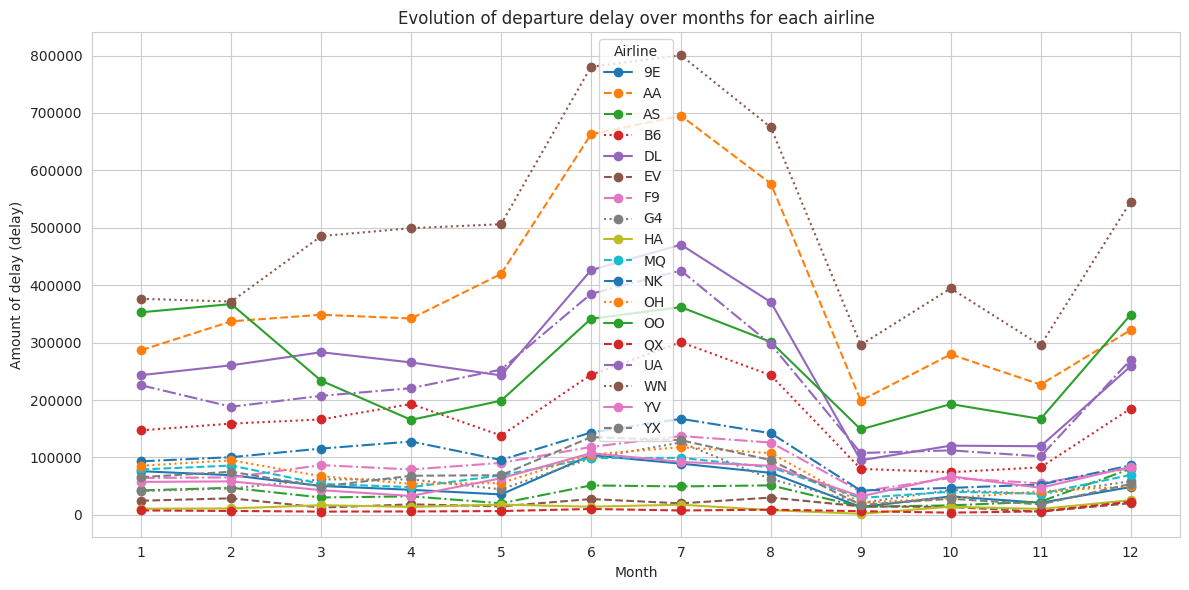

In [ ]:
# Determine the number of unique airlines
num_airlines = delaydep_per_airline_companies_per_month.shape[0]

# Define colors and line styles using Seaborn's palettes
colors = sns.color_palette("tab10", n_colors=num_airlines)
line_styles = ['-', '--', '-.', ':']

# Line Plot
plt.figure(figsize=(12, 6))

# Plot lines for each airline
for i, airline in enumerate(delaydep_per_airline_companies_per_month.index):
    plt.plot(delaydep_per_airline_companies_per_month.columns, delaydep_per_airline_companies_per_month.loc[airline],
             marker='o', linestyle=line_styles[i%len(line_styles)], color=colors[i],
             label=airline)

plt.title("Evolution of departure delay over months for each airline")
plt.xlabel("Month")
plt.ylabel("Amount of delay (delay)")
plt.xticks(range(1, 13))
plt.legend(title="Airline")
plt.grid(True)  # Add grid
plt.tight_layout()  # Adjust plot to avoid overlapping labels
plt.show()

In [ ]:
delaydep_per_airline_companies_per_origin = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["ORIGIN"],
                                        aggfunc="sum" )["DEP_DELAY"]
delaydep_per_airline_companies_per_origin

<ipython-input-17-0139dfd74bbc>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delaydep_per_airline_companies_per_origin = df.pivot_table(


ORIGIN           ABE     ABI      ABQ     ABR     ABY     ACK     ACT  \
AIRLINE_CODE                                                            
9E            5105.0     NaN      NaN     NaN   210.0  2883.0     NaN   
AA               NaN     NaN  13010.0     NaN     NaN     NaN     NaN   
AS               NaN     NaN    929.0     NaN     NaN     NaN     NaN   
B6               NaN     NaN   5030.0     NaN     NaN  8934.0     NaN   
DL             -47.0     NaN   1154.0     NaN     NaN     NaN     NaN   
EV             -42.0     NaN    312.0     NaN     NaN     NaN     NaN   
F9               NaN     NaN     19.0     NaN     NaN     NaN     NaN   
G4            6558.0     NaN    105.0     NaN     NaN     NaN     NaN   
HA               NaN     NaN      NaN     NaN     NaN     NaN     NaN   
MQ            1000.0  6544.0   1071.0     NaN     NaN   -13.0  2928.0   
NK               NaN     NaN   1516.0     NaN     NaN     NaN     NaN   
OH            1134.0     NaN      NaN     NaN     NaN     NaN     NaN   
OO            5010.0   682.0   9299.0  4735.0  1021.0     NaN  3191.0   
QX               NaN     NaN    165.0     NaN     NaN     NaN     NaN   
UA               NaN     NaN   4889.0     NaN     NaN     NaN     NaN   
WN               NaN     NaN  36413.0     NaN     NaN     NaN     NaN   
YV               NaN     NaN   5691.0     NaN     NaN     NaN     NaN   
YX               NaN     NaN     19.0     NaN     NaN  1484.0     NaN   

ORIGIN            ACV     ACY    ADK     ADQ     AEX     AGS    AKN      ALB  \
AIRLINE_CODE                                                                   
9E                NaN     NaN    NaN     NaN  2059.0  4718.0    NaN   1738.0   
AA                NaN     NaN    NaN     NaN     NaN   148.0    NaN   3853.0   
AS                NaN     NaN  481.0 -1006.0     NaN     NaN  385.0      NaN   
B6                NaN     NaN    NaN     NaN     NaN     NaN    NaN   7266.0   
DL                NaN     NaN    NaN     NaN     NaN   371.0    NaN   3860.0   
EV                NaN     NaN    NaN     NaN   856.0     NaN    NaN    351.0   
F9                NaN     NaN    NaN     NaN     NaN     NaN    NaN   1809.0   
G4                NaN     NaN    NaN     NaN     NaN     NaN    NaN   5040.0   
HA                NaN     NaN    NaN     NaN     NaN     NaN    NaN      NaN   
MQ                NaN     NaN    NaN     NaN  2912.0  1340.0    NaN    681.0   
NK                NaN  6940.0    NaN     NaN     NaN     NaN    NaN      NaN   
OH                NaN     NaN    NaN     NaN  -141.0  6883.0    NaN   2735.0   
OO            11975.0     NaN    NaN     NaN  1499.0  1735.0    NaN   2896.0   
QX                NaN     NaN    NaN     NaN     NaN     NaN  202.0      NaN   
UA                NaN     NaN    NaN     NaN     NaN     NaN    NaN   3329.0   
WN                NaN     NaN    NaN     NaN     NaN     NaN    NaN  10126.0   
YV                NaN     NaN    NaN     NaN     NaN   610.0    NaN    -20.0   
YX                NaN     NaN    NaN     NaN     NaN    55.0    NaN   1332.0   

ORIGIN          ALO     ALS    ALW     AMA     ANC     APN    ART      ASE  \
AIRLINE_CODE                                                                 
9E              NaN     NaN    NaN     NaN     NaN     NaN    NaN      NaN   
AA              NaN     NaN    NaN  4780.0  3622.0     NaN    NaN      NaN   
AS              NaN     NaN    NaN     NaN -1377.0     NaN    NaN      NaN   
B6              NaN     NaN    NaN     NaN   253.0     NaN    NaN      NaN   
DL              NaN     NaN    NaN     NaN  5726.0     NaN    NaN      NaN   
EV              NaN     NaN    NaN   472.0     NaN     NaN    NaN      NaN   
F9              NaN     NaN    NaN     NaN    20.0     NaN    NaN      NaN   
G4              NaN     NaN    NaN    78.0    -3.0     NaN    NaN      NaN   
HA              NaN     NaN    NaN     NaN     NaN     NaN    NaN      NaN   
MQ            798.0     NaN    NaN  1424.0     NaN     NaN    NaN      NaN   
NK

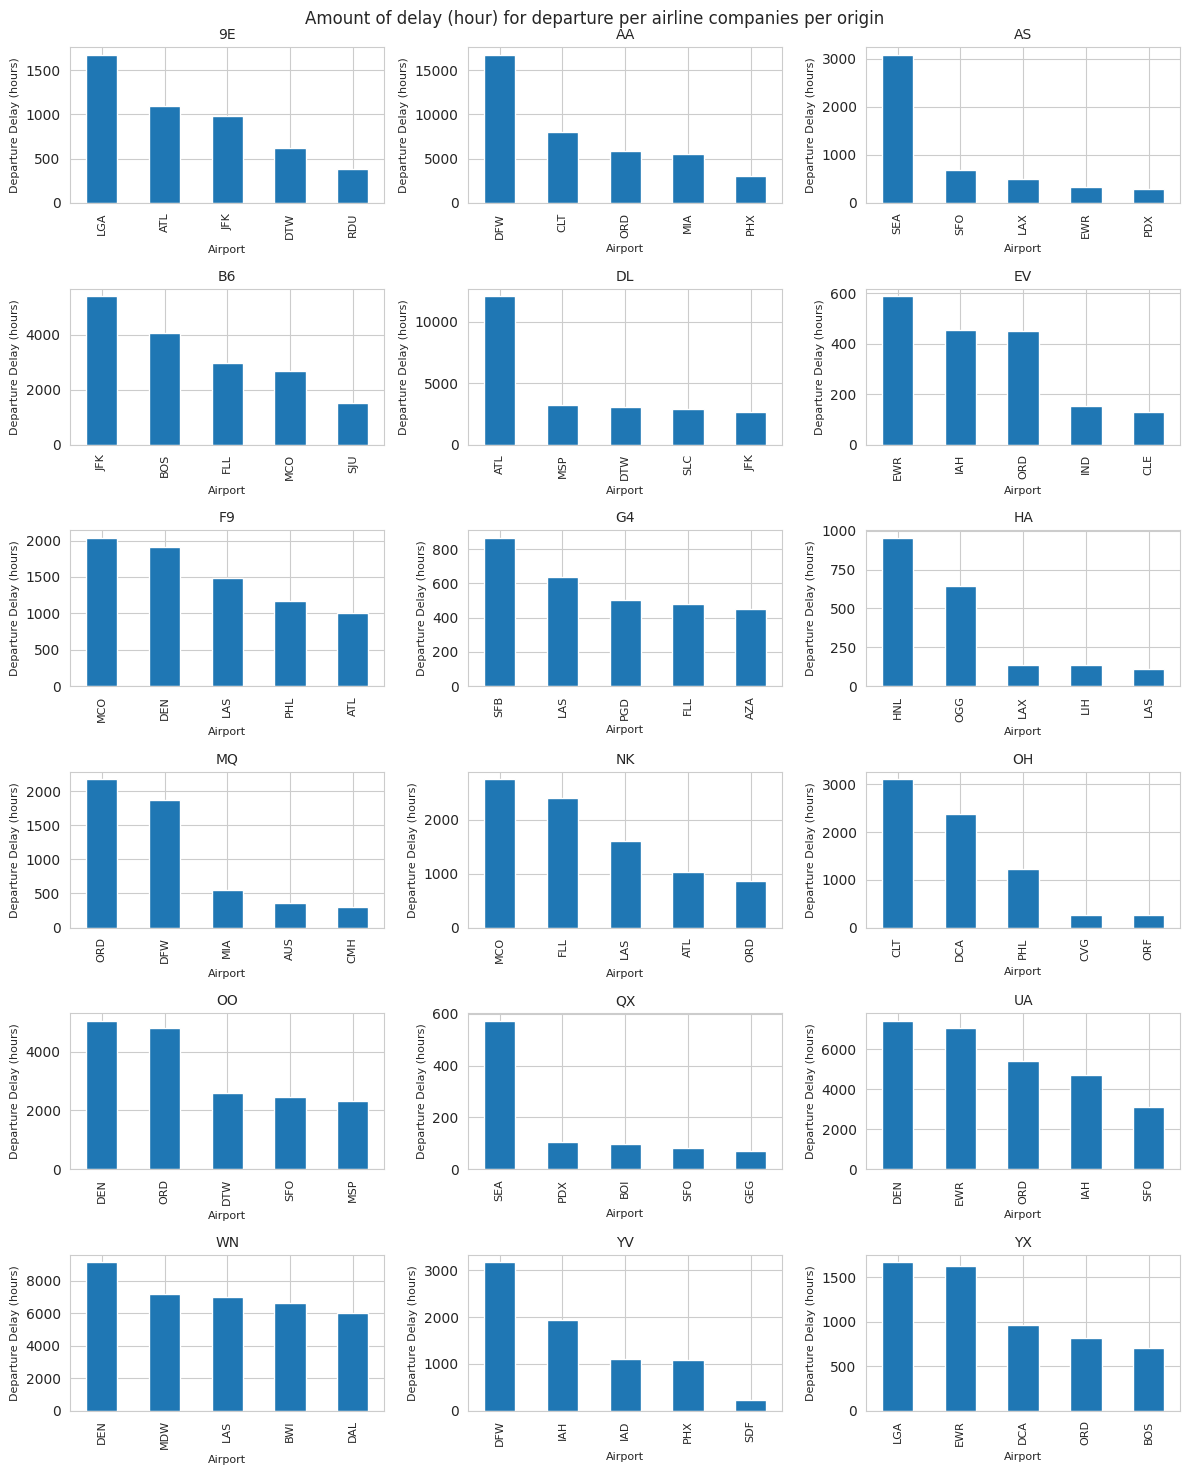

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Amount of delay (hour) for departure per airline companies per origin')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(delaydep_per_airline_companies_per_origin.index):
    # Sélection des cinq premières valeurs maximales
    top5 = delaydep_per_airline_companies_per_origin.loc[airline_code].nlargest(5) / 60
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Departure Delay (hours)", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(delaydep_per_airline_companies_per_origin.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
delaydep_per_airline_companies_per_dest = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["DEST"],
                                        aggfunc="sum" )["DEP_DELAY"]
delaydep_per_airline_companies_per_dest

<ipython-input-19-8fd75442830b>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delaydep_per_airline_companies_per_dest = df.pivot_table(


DEST             ABE     ABI      ABQ     ABR     ABY     ACK     ACT  \
AIRLINE_CODE                                                            
9E            1152.0     NaN      NaN     NaN   678.0   527.0     NaN   
AA               NaN     NaN  11869.0     NaN     NaN     NaN     NaN   
AS               NaN     NaN   1165.0     NaN     NaN     NaN     NaN   
B6               NaN     NaN   2875.0     NaN     NaN  5473.0     NaN   
DL             197.0     NaN   2982.0     NaN     NaN     NaN     NaN   
EV             764.0     NaN    504.0     NaN     NaN     NaN     NaN   
F9               NaN     NaN    277.0     NaN     NaN     NaN     NaN   
G4            9552.0     NaN    165.0     NaN     NaN     NaN     NaN   
HA               NaN     NaN      NaN     NaN     NaN     NaN     NaN   
MQ            1557.0  3901.0   1199.0     NaN     NaN     0.0  2107.0   
NK               NaN     NaN     52.0     NaN     NaN     NaN     NaN   
OH            2583.0     NaN      NaN     NaN     NaN     NaN     NaN   
OO            4400.0  -206.0  10354.0  1320.0  1279.0     NaN   539.0   
QX               NaN     NaN    -11.0     NaN     NaN     NaN     NaN   
UA               NaN     NaN   8985.0     NaN     NaN     NaN     NaN   
WN               NaN     NaN  41928.0     NaN     NaN     NaN     NaN   
YV               NaN     NaN   7867.0     NaN     NaN     NaN     NaN   
YX               NaN     NaN    177.0     NaN     NaN   -84.0     NaN   

DEST              ACV      ACY   ADK   ADQ     AEX     AGS    AKN      ALB  \
AIRLINE_CODE                                                                 
9E                NaN      NaN   NaN   NaN  1532.0  3515.0    NaN   1851.0   
AA                NaN      NaN   NaN   NaN     NaN   -20.0    NaN   2825.0   
AS                NaN      NaN -73.0  63.0     NaN     NaN    0.0      NaN   
B6                NaN      NaN   NaN   NaN     NaN     NaN    NaN   4021.0   
DL                NaN      NaN   NaN   NaN     NaN   805.0    NaN   5762.0   
EV                NaN      NaN   NaN   NaN   324.0     NaN    NaN    353.0   
F9                NaN      NaN   NaN   NaN     NaN     NaN    NaN    934.0   
G4                NaN      NaN   NaN   NaN     NaN     NaN    NaN   1141.0   
HA                NaN      NaN   NaN   NaN     NaN     NaN    NaN      NaN   
MQ                NaN      NaN   NaN   NaN   510.0  1765.0    NaN   1151.0   
NK                NaN  15207.0   NaN   NaN     NaN     NaN    NaN      NaN   
OH                NaN      NaN   NaN   NaN   619.0  3160.0    NaN   5966.0   
OO            10868.0      NaN   NaN   NaN   472.0  1582.0    NaN   3909.0   
QX                NaN      NaN   NaN   NaN     NaN     NaN  604.0      NaN   
UA                NaN      NaN   NaN   NaN     NaN     NaN    NaN   3869.0   
WN                NaN      NaN   NaN   NaN     NaN     NaN    NaN  19250.0   
YV                NaN      NaN   NaN   NaN     NaN   966.0    NaN    109.0   
YX                NaN      NaN   NaN   NaN     NaN    52.0    NaN    753.0   

DEST             ALO    ALS    ALW     AMA      ANC     APN    ART      ASE  \
AIRLINE_CODE                                                                  
9E               NaN    NaN    NaN     NaN      NaN     NaN    NaN      NaN   
AA               NaN    NaN    NaN  2849.0   4415.0     NaN    NaN      NaN   
AS               NaN    NaN    NaN     NaN  17716.0     NaN    NaN      NaN   
B6               NaN    NaN    NaN     NaN    396.0     NaN    NaN      NaN   
DL               NaN    NaN    NaN     NaN   6108.0     NaN    NaN      NaN   
EV               NaN    NaN    NaN  1557.0      NaN     NaN    NaN      NaN   
F9               NaN    NaN    NaN     NaN    -12.0     NaN    NaN      NaN   
G4               NaN    NaN    NaN   199.0    -12.0     NaN    NaN      NaN   
HA               NaN    NaN    NaN     NaN      NaN     NaN    NaN      NaN   
MQ            1101.0    NaN    NaN  1881.0      NaN     NaN    NaN      NaN   
NK               NaN    NaN   

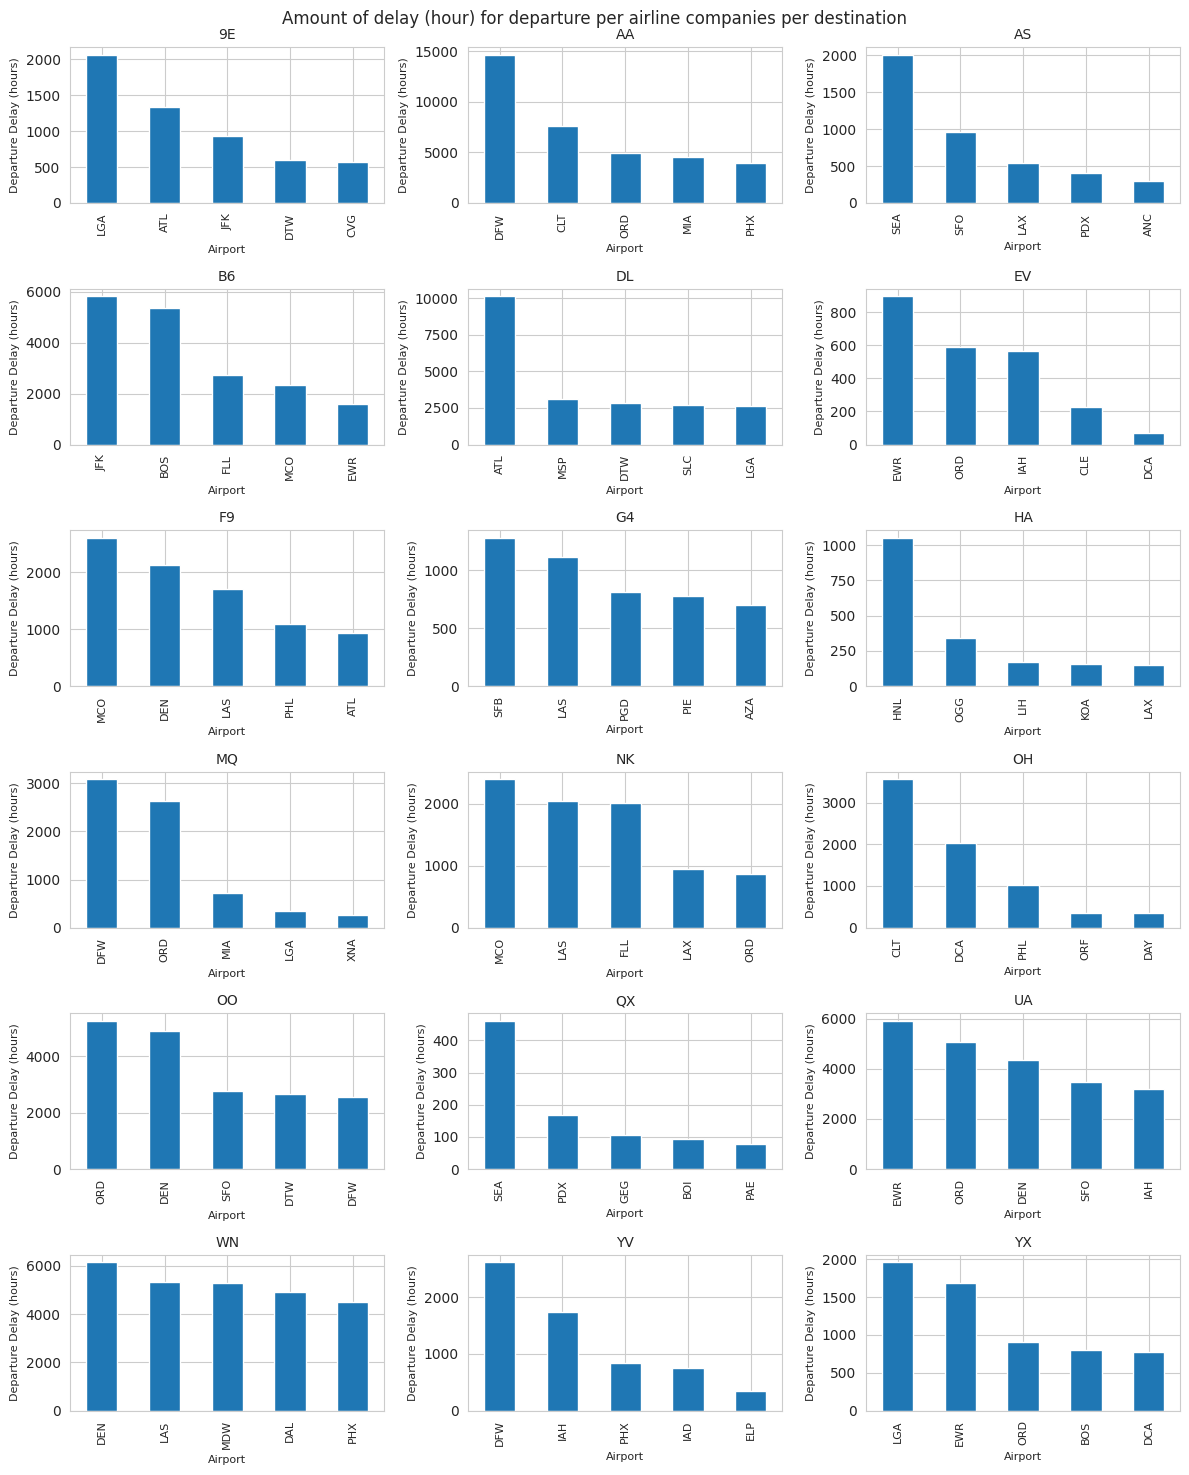

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Amount of delay (hour) for departure per airline companies per destination')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(delaydep_per_airline_companies_per_dest.index):
    # Sélection des cinq premières valeurs maximales
    top5 = delaydep_per_airline_companies_per_dest.loc[airline_code].nlargest(5) / 60
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Departure Delay (hours)", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(delaydep_per_airline_companies_per_dest.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
delayarr_per_airline_companies_per_month = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["month"],
                                        aggfunc="sum" )["ARR_DELAY"]
delayarr_per_airline_companies_per_month

<ipython-input-21-ad8ddc529c70>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delayarr_per_airline_companies_per_month = df.pivot_table(


month               1         2         3         4         5         6   \
AIRLINE_CODE                                                               
9E             -4791.0   -4279.0  -32000.0  -15902.0  -28866.0   38069.0   
AA             72543.0  172332.0  148263.0  158977.0  218714.0  499238.0   
AS             13231.0   25491.0   -5528.0     969.0   -9835.0   21855.0   
B6             90780.0  100731.0   87891.0  125889.0   64767.0  185949.0   
DL            -34635.0   14863.0   -2127.0   33515.0   -9659.0  188971.0   
EV             16414.0   20781.0    3228.0   11331.0   11618.0   27035.0   
F9             29088.0   37254.0   56055.0   59812.0   68503.0   97732.0   
G4             35246.0   41348.0   60666.0   58681.0   38107.0   99454.0   
HA              6945.0    8047.0   14552.0   11740.0   13768.0    8696.0   
MQ             39314.0   52062.0    7990.0    9493.0   33637.0   70855.0   
NK             49982.0   62862.0   75146.0   99178.0   63598.0  108885.0   
OH             44641.0   58526.0   19693.0    6622.0   10932.0   75922.0   
OO            158806.0  199739.0   45673.0    7612.0   42561.0  218821.0   
QX              1919.0    4311.0     193.0     916.0    2235.0    6589.0   
UA             70459.0   55712.0   61205.0   98746.0  128740.0  284317.0   
WN            -39918.0   -5545.0   96477.0  164662.0  154288.0  462525.0   
YV             27226.0   36943.0   14462.0    8519.0   36474.0   90766.0   
YX             -5941.0   12738.0  -25078.0   -5361.0   -8027.0   80048.0   

month               7         8        9         10       11        12  
AIRLINE_CODE                                                            
9E             18545.0    6767.0 -42571.0  -25486.0 -34609.0  -13125.0  
AA            496831.0  361546.0  28913.0  113751.0  42055.0  159605.0  
AS             12806.0   23525.0 -10783.0  -18107.0  -1587.0   55880.0  
B6            238742.0  179112.0  33345.0   34253.0  44882.0  157244.0  
DL            223569.0  110108.0 -85919.0  -55012.0 -49325.0   87177.0  
EV             20701.0   29996.0  10319.0   11732.0   1205.0   15724.0  
F9            116032.0   97993.0  14852.0   37080.0  28756.0   52962.0  
G4            129817.0   60809.0  16559.0   36944.0  32319.0   56658.0  
HA             12811.0    4514.0  -1285.0   13023.0   8070.0   22575.0  
MQ             64250.0   44521.0   4848.0   16923.0   3250.0   37513.0  
NK            116305.0   92491.0    516.0    5720.0  19276.0   54389.0  
OH             90755.0   78265.0  -7474.0    -843.0   6930.0   22580.0  
OO            228965.0  159880.0   8824.0   54353.0  18382.0  204137.0  
QX              1662.0    3976.0   1828.0    -845.0   3359.0   21945.0  
UA            295577.0  151998.0 -14797.0  -18151.0 -19347.0  155825.0  
WN            428174.0  303397.0 -21083.0   79929.0 -55227.0  249899.0  
YV             73213.0   62023.0   1045.0   38886.0  15250.0   51888.0  
YX             78505.0   39840.0 -41561.0  -19328.0 -29340.0    5036.0

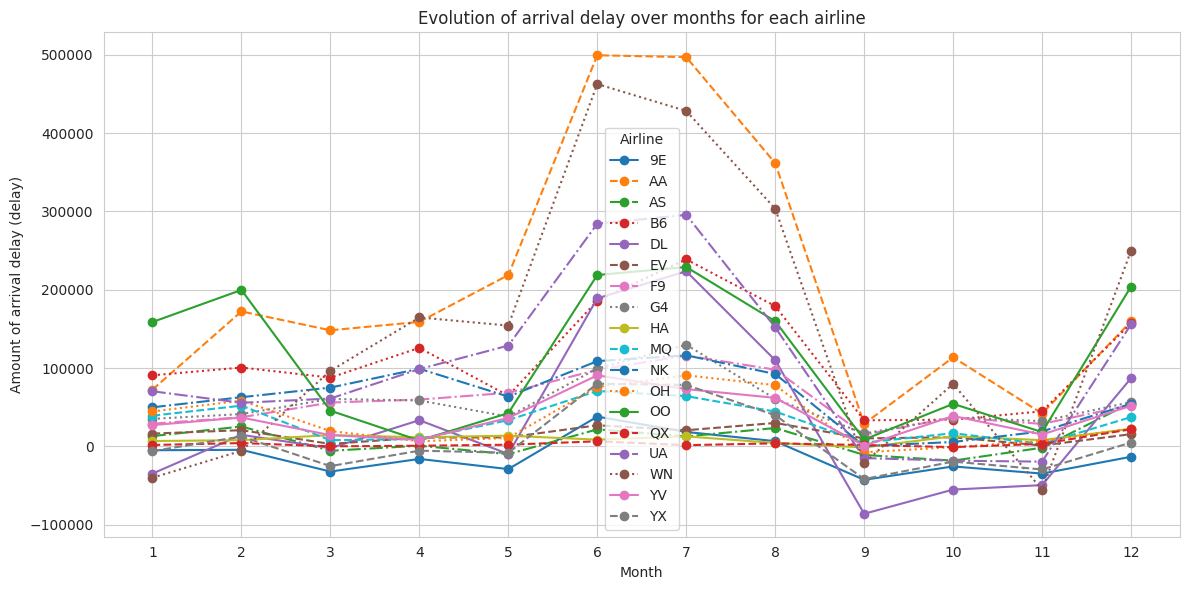

In [ ]:
# Determine the number of unique airlines
num_airlines = delayarr_per_airline_companies_per_month.shape[0]

# Define colors and line styles using Seaborn's palettes
colors = sns.color_palette("tab10", n_colors=num_airlines)
line_styles = ['-', '--', '-.', ':']

# Line Plot
plt.figure(figsize=(12, 6))

# Plot lines for each airline
for i, airline in enumerate(delayarr_per_airline_companies_per_month.index):
    plt.plot(delayarr_per_airline_companies_per_month.columns, delayarr_per_airline_companies_per_month.loc[airline],
             marker='o', linestyle=line_styles[i%len(line_styles)], color=colors[i],
             label=airline)

plt.title("Evolution of arrival delay over months for each airline")
plt.xlabel("Month")
plt.ylabel("Amount of arrival delay (delay)")
plt.xticks(range(1, 13))
plt.legend(title="Airline")
plt.grid(True)  # Add grid
plt.tight_layout()  # Adjust plot to avoid overlapping labels
plt.show()

In [ ]:
delayarr_per_airline_companies_per_origin = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["ORIGIN"],
                                        aggfunc="sum" )["ARR_DELAY"]
delayarr_per_airline_companies_per_origin

<ipython-input-23-6af456d0762a>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delayarr_per_airline_companies_per_origin = df.pivot_table(


ORIGIN           ABE     ABI      ABQ     ABR     ABY     ACK     ACT     ACV  \
AIRLINE_CODE                                                                    
9E            1833.0     NaN      NaN     NaN -1085.0  2377.0     NaN     NaN   
AA               NaN     NaN   8099.0     NaN     NaN     NaN     NaN     NaN   
AS               NaN     NaN   -174.0     NaN     NaN     NaN     NaN     NaN   
B6               NaN     NaN   4340.0     NaN     NaN  7845.0     NaN     NaN   
DL             -95.0     NaN   -670.0     NaN     NaN     NaN     NaN     NaN   
EV            -119.0     NaN    278.0     NaN     NaN     NaN     NaN     NaN   
F9               NaN     NaN   -131.0     NaN     NaN     NaN     NaN     NaN   
G4            6835.0     NaN     24.0     NaN     NaN     NaN     NaN     NaN   
HA               NaN     NaN      NaN     NaN     NaN     NaN     NaN     NaN   
MQ           -1242.0  6064.0   -510.0     NaN     NaN   -43.0  1533.0     NaN   
NK               NaN     NaN   1569.0     NaN     NaN     NaN     NaN     NaN   
OH           -6803.0     NaN      NaN     NaN     NaN     NaN     NaN     NaN   
OO            2611.0  -339.0   3244.0  2501.0    37.0     NaN  3211.0  9121.0   
QX               NaN     NaN     33.0     NaN     NaN     NaN     NaN     NaN   
UA               NaN     NaN   3307.0     NaN     NaN     NaN     NaN     NaN   
WN               NaN     NaN  10565.0     NaN     NaN     NaN     NaN     NaN   
YV               NaN     NaN   2870.0     NaN     NaN     NaN     NaN     NaN   
YX               NaN     NaN   -351.0     NaN     NaN   140.0     NaN     NaN   

ORIGIN           ACY    ADK   ADQ     AEX     AGS    AKN     ALB   ALO    ALS  \
AIRLINE_CODE                                                                    
9E               NaN    NaN   NaN -1149.0 -2468.0    NaN  -628.0   NaN    NaN   
AA               NaN    NaN   NaN     NaN   161.0    NaN  1961.0   NaN    NaN   
AS               NaN  399.0 -33.0     NaN     NaN  532.0     NaN   NaN    NaN   
B6               NaN    NaN   NaN     NaN     NaN    NaN  5122.0   NaN    NaN   
DL               NaN    NaN   NaN     NaN -1157.0    NaN  -446.0   NaN    NaN   
EV               NaN    NaN   NaN   763.0     NaN    NaN   129.0   NaN    NaN   
F9               NaN    NaN   NaN     NaN     NaN    NaN   950.0   NaN    NaN   
G4               NaN    NaN   NaN     NaN     NaN    NaN  5272.0   NaN    NaN   
HA               NaN    NaN   NaN     NaN     NaN    NaN     NaN   NaN    NaN   
MQ               NaN    NaN   NaN  2710.0   914.0    NaN  -549.0  99.0    NaN   
NK            2659.0    NaN   NaN     NaN     NaN    NaN     NaN   NaN    NaN   
OH               NaN    NaN   NaN  -417.0  4996.0    NaN  1314.0   NaN    NaN   
OO               NaN    NaN   NaN   643.0   448.0    NaN   224.0   NaN  467.0   
QX               NaN    NaN   NaN     NaN     NaN  -60.0     NaN   NaN    NaN   
UA               NaN    NaN   NaN     NaN     NaN    NaN  2240.0   NaN    NaN   
WN               NaN    NaN   NaN     NaN     NaN    NaN  -313.0   NaN    NaN   
YV               NaN    NaN   NaN     NaN   520.0    NaN    -7.0   NaN    NaN   
YX               NaN    NaN   NaN     NaN    14.0    NaN -1022.0   NaN    NaN   

ORIGIN          ALW     AMA     ANC    APN    ART      ASE       ATL     ATW  \
AIRLINE_CODE                                                                   
9E              NaN     NaN     NaN    NaN    NaN      NaN  -27710.0 -2280.0   
AA              NaN  3943.0  2164.0    NaN    NaN      NaN   22709.0     NaN   
AS              NaN     NaN -9840.0    NaN    NaN      NaN     509.0     NaN   
B6              NaN     NaN   132.0    NaN    NaN      NaN   22105.0     NaN   
DL              NaN     NaN -3018.0    NaN    NaN      NaN  189668.0  -430.0   
EV              NaN   310.0     NaN    NaN    NaN      NaN    -205.0     NaN   
F9              NaN     NaN    11.0    NaN    NaN      NaN   48026.0     NaN   
G4              NaN    47.0   -12.0   

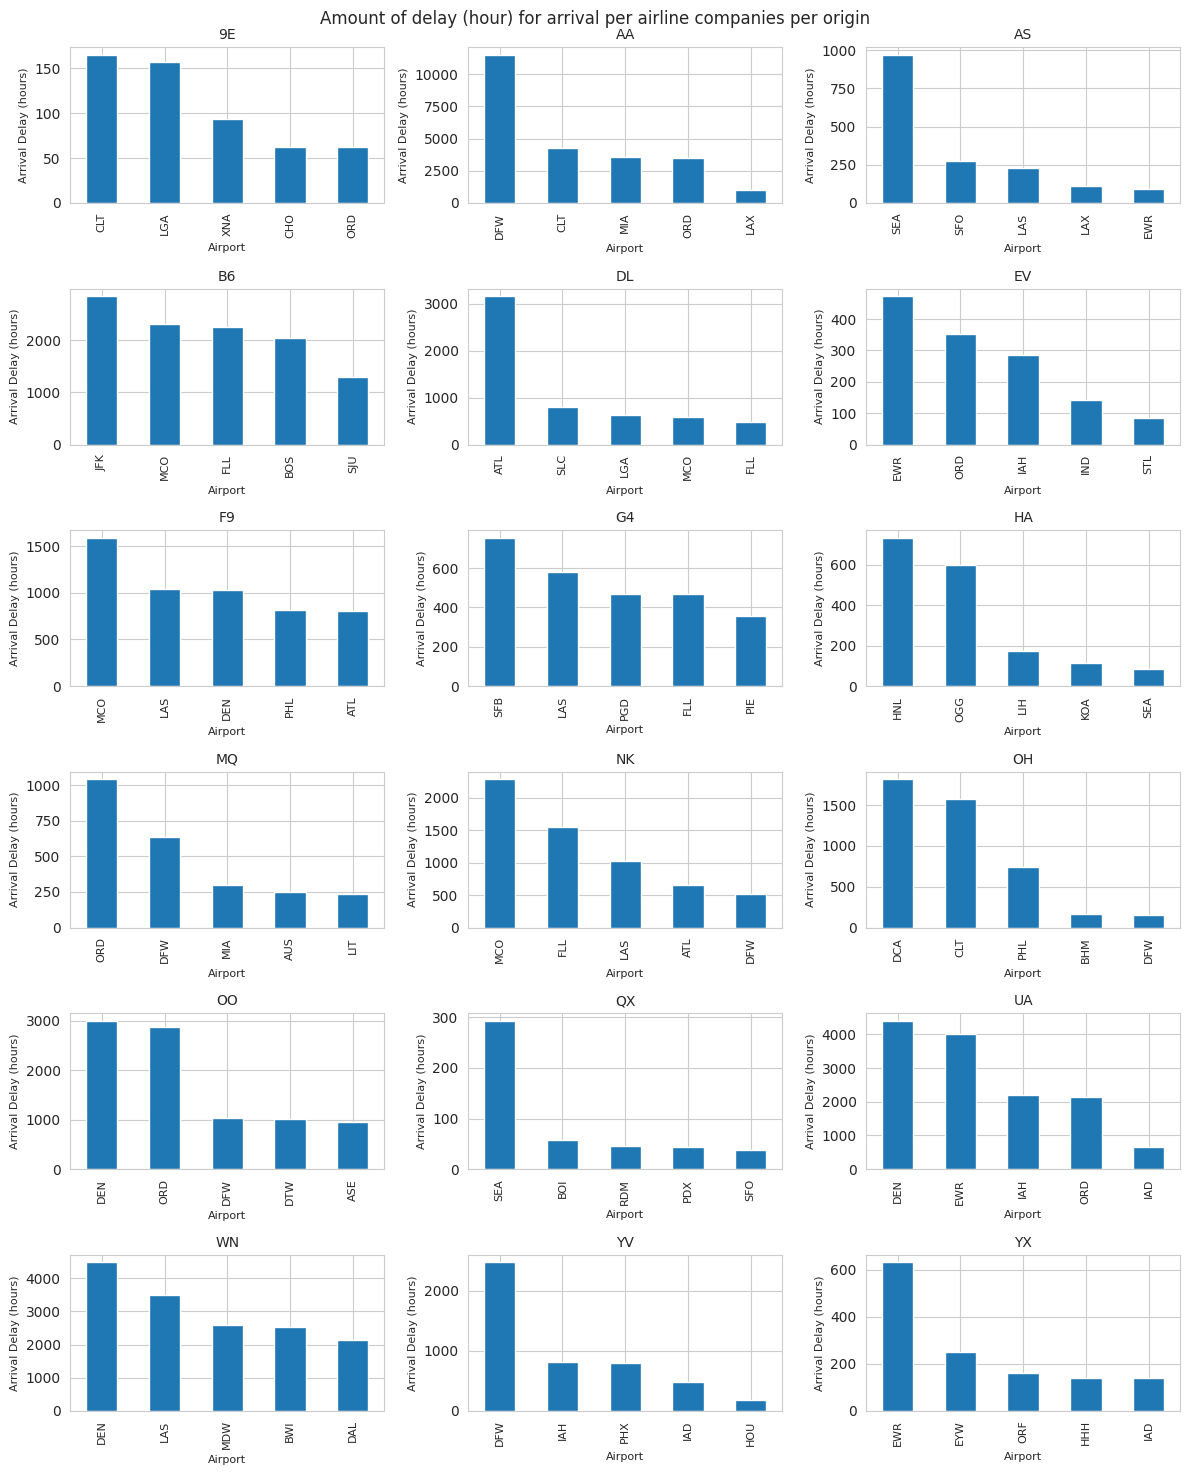

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Amount of delay (hour) for arrival per airline companies per origin')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(delayarr_per_airline_companies_per_origin.index):
    # Sélection des cinq premières valeurs maximales
    top5 = delayarr_per_airline_companies_per_origin.loc[airline_code].nlargest(5) / 60
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Arrival Delay (hours)", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(delayarr_per_airline_companies_per_origin.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
delayarr_per_airline_companies_per_dest = df.pivot_table(
                                        index="AIRLINE_CODE" ,
                                        columns= ["DEST"],
                                        aggfunc="sum" )["ARR_DELAY"]
delayarr_per_airline_companies_per_dest

<ipython-input-25-c2029b3d5fd7>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  delayarr_per_airline_companies_per_dest = df.pivot_table(


DEST             ABE     ABI      ABQ     ABR    ABY     ACK    ACT     ACV  \
AIRLINE_CODE                                                                  
9E           -1154.0     NaN      NaN     NaN -312.0  -477.0    NaN     NaN   
AA               NaN     NaN   8005.0     NaN    NaN     NaN    NaN     NaN   
AS               NaN     NaN     69.0     NaN    NaN     NaN    NaN     NaN   
B6               NaN     NaN   1133.0     NaN    NaN  3132.0    NaN     NaN   
DL            -220.0     NaN    688.0     NaN    NaN     NaN    NaN     NaN   
EV             667.0     NaN    436.0     NaN    NaN     NaN    NaN     NaN   
F9               NaN     NaN    257.0     NaN    NaN     NaN    NaN     NaN   
G4            9067.0     NaN     44.0     NaN    NaN     NaN    NaN     NaN   
HA               NaN     NaN      NaN     NaN    NaN     NaN    NaN     NaN   
MQ            1047.0  3040.0   -223.0     NaN    NaN    -1.0  619.0     NaN   
NK               NaN     NaN    -11.0     NaN    NaN     NaN    NaN     NaN   
OH            1949.0     NaN      NaN     NaN    NaN     NaN    NaN     NaN   
OO            1500.0 -1051.0   3283.0 -1875.0  547.0     NaN  340.0  5956.0   
QX               NaN     NaN     -6.0     NaN    NaN     NaN    NaN     NaN   
UA               NaN     NaN   7078.0     NaN    NaN     NaN    NaN     NaN   
WN               NaN     NaN  15148.0     NaN    NaN     NaN    NaN     NaN   
YV               NaN     NaN   5679.0     NaN    NaN     NaN    NaN     NaN   
YX               NaN     NaN   -566.0     NaN    NaN  -947.0    NaN     NaN   

DEST              ACY   ADK   ADQ     AEX     AGS    AKN     ALB   ALO    ALS  \
AIRLINE_CODE                                                                    
9E                NaN   NaN   NaN  -356.0  -683.0    NaN -1162.0   NaN    NaN   
AA                NaN   NaN   NaN     NaN    14.0    NaN  1173.0   NaN    NaN   
AS                NaN -64.0  50.0     NaN     NaN  -47.0     NaN   NaN    NaN   
B6                NaN   NaN   NaN     NaN     NaN    NaN  3315.0   NaN    NaN   
DL                NaN   NaN   NaN     NaN    -6.0    NaN  3324.0   NaN    NaN   
EV                NaN   NaN   NaN    77.0     NaN    NaN   225.0   NaN    NaN   
F9                NaN   NaN   NaN     NaN     NaN    NaN   180.0   NaN    NaN   
G4                NaN   NaN   NaN     NaN     NaN    NaN   898.0   NaN    NaN   
HA                NaN   NaN   NaN     NaN     NaN    NaN     NaN   NaN    NaN   
MQ                NaN   NaN   NaN -1037.0  1612.0    NaN  1124.0 -98.0    NaN   
NK            10136.0   NaN   NaN     NaN     NaN    NaN     NaN   NaN    NaN   
OH                NaN   NaN   NaN   496.0  1916.0    NaN  4753.0   NaN    NaN   
OO                NaN   NaN   NaN   294.0   955.0    NaN  1037.0   NaN -361.0   
QX                NaN   NaN   NaN     NaN     NaN  315.0     NaN   NaN    NaN   
UA                NaN   NaN   NaN     NaN     NaN    NaN  2816.0   NaN    NaN   
WN                NaN   NaN   NaN     NaN     NaN    NaN  9318.0   NaN    NaN   
YV                NaN   NaN   NaN     NaN   658.0    NaN    42.0   NaN    NaN   
YX                NaN   NaN   NaN     NaN   100.0    NaN  -794.0   NaN    NaN   

DEST            ALW     AMA     ANC     APN    ART      ASE      ATL     ATW  \
AIRLINE_CODE                                                                   
9E              NaN     NaN     NaN     NaN    NaN      NaN -52016.0  -109.0   
AA              NaN  2407.0  3404.0     NaN    NaN      NaN  34762.0     NaN   
AS              NaN     NaN  3317.0     NaN    NaN      NaN     63.0     NaN   
B6              NaN     NaN   246.0     NaN    NaN      NaN  13574.0     NaN   
DL              NaN     NaN  -551.0     NaN    NaN      NaN -49218.0  -313.0   
EV              NaN  1458.0     NaN     NaN    NaN      NaN     50.0     NaN   
F9              NaN     NaN   -26.0     NaN    NaN      NaN  46082.0     NaN   
G4              NaN   212.0   -37.0     NaN    NaN      NaN      NaN  5149.0  

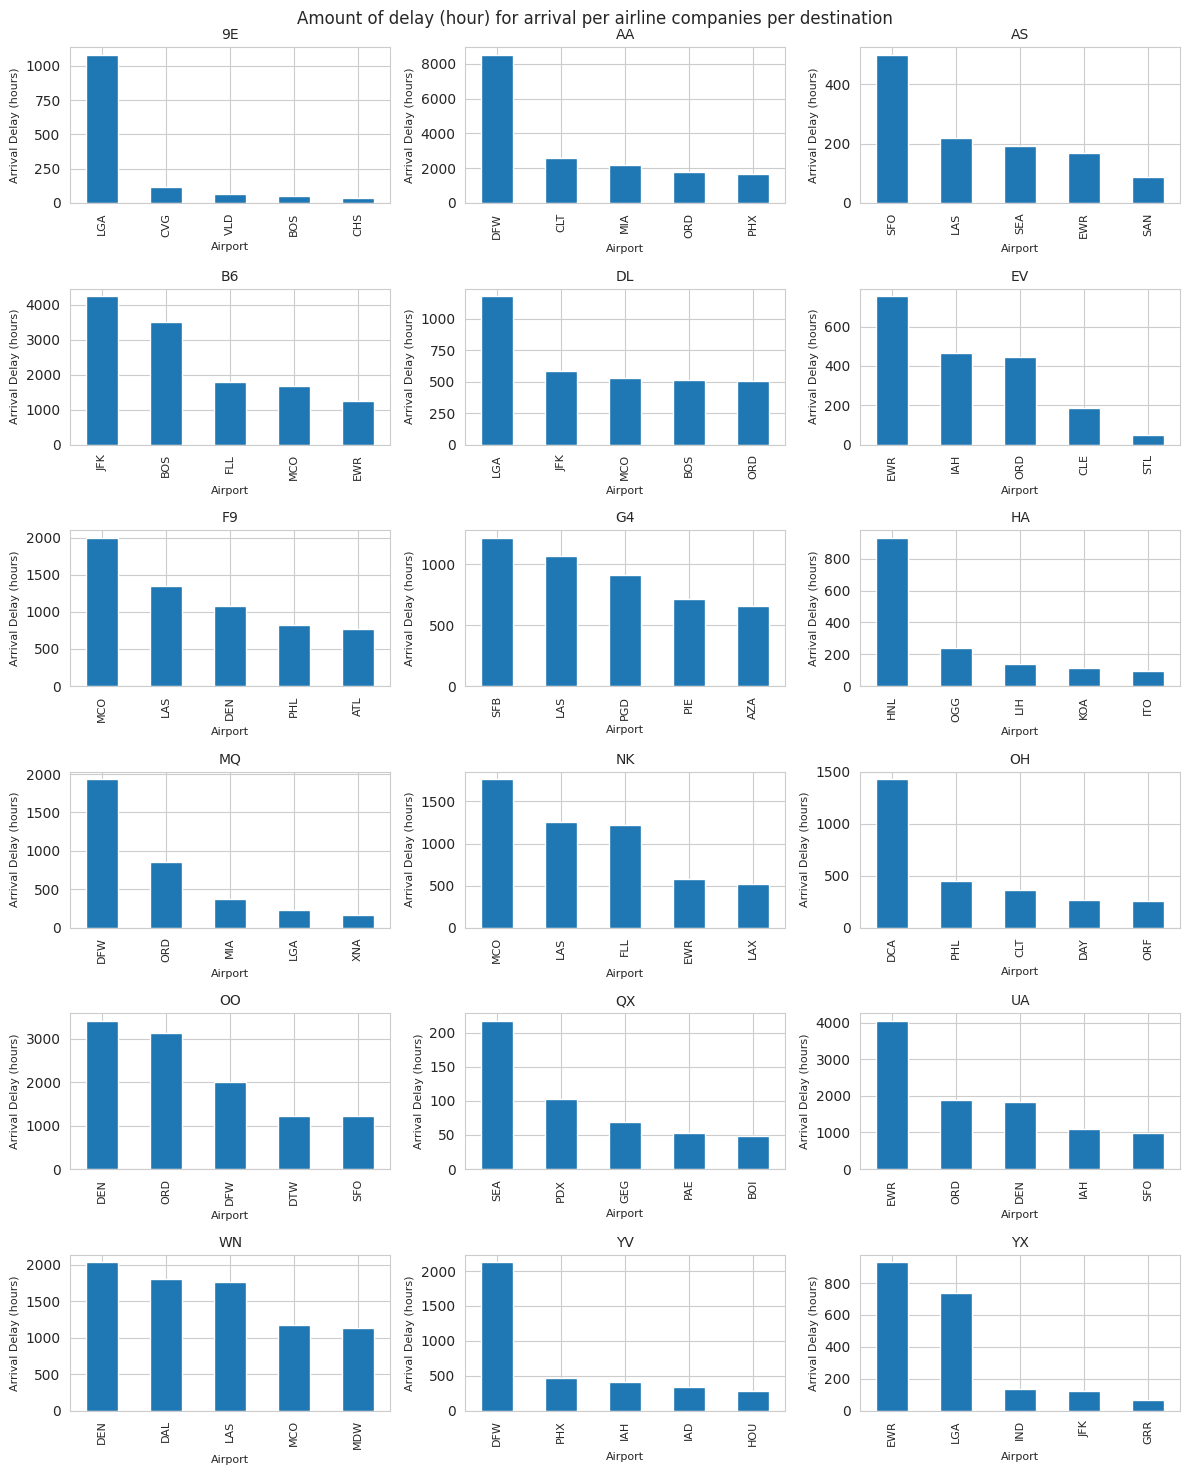

In [ ]:
# Création de 18 sous-graphiques (6 lignes x 3 colonnes)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))
fig.suptitle('Amount of delay (hour) for arrival per airline companies per destination')

# À plat, 'axes' est une liste de listes à 2 dimensions. On l'aplatit pour pouvoir l'indexer plus facilement.
axes = axes.flatten()

# Boucle sur chaque compagnie aérienne
for i, airline_code in enumerate(delayarr_per_airline_companies_per_dest.index):
    # Sélection des cinq premières valeurs maximales
    top5 = delayarr_per_airline_companies_per_dest.loc[airline_code].nlargest(5) / 60
    # Création du graphique correspondant
    top5.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{airline_code}", fontsize=10)  # Réduire la taille de la police
    axes[i].set_xlabel("Airport", fontsize=8)  # Réduire la taille de la police et rotation de 45 degrés
    axes[i].set_ylabel("Arrival Delay (hours)", fontsize=8)  # Réduire la taille de la police

    # Réduire la taille de la police des valeurs de l'axe x
    axes[i].tick_params(axis='x', labelsize=8)

# Suppression des axes inutilisés
for j in range(len(delayarr_per_airline_companies_per_dest.index), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Yearly Analysis**

In [ ]:
yearly_cancellation_per_airline_companies = df.pivot_table(
    index="AIRLINE_CODE" ,
    columns= ["year"],
    aggfunc="sum" )['CANCELLED']
yearly_cancellation_per_airline_companies

<ipython-input-27-9050e0b7e930>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  yearly_cancellation_per_airline_companies = df.pivot_table(


year            2019    2020    2021    2022    2023
AIRLINE_CODE                                        
9E             449.0   677.0    94.0   831.0   343.0
AA            2031.0  3545.0  1737.0  2647.0   947.0
AS             293.0   566.0   311.0   594.0   170.0
B6             399.0   754.0   341.0  1055.0   490.0
DL             179.0  2957.0   389.0  1472.0   985.0
EV             636.0   426.0     NaN     NaN     NaN
F9             217.0   474.0   186.0   452.0   337.0
G4              48.0  1488.0   385.0   392.0    70.0
HA               8.0   207.0    30.0    68.0    75.0
MQ            1139.0  1107.0   601.0   589.0   197.0
NK             354.0   339.0   570.0   686.0   363.0
OH             692.0  1447.0   236.0   693.0   233.0
OO            1749.0  2568.0  1332.0  1363.0   733.0
QX               NaN     NaN   225.0   149.0     NaN
UA             533.0  2260.0   593.0  1220.0   930.0
WN            3405.0  8072.0  2395.0  4340.0  1253.0
YV             691.0   820.0   485.0   377.0     NaN
YX             771.0  1050.0   622.0  1520.0   683.0

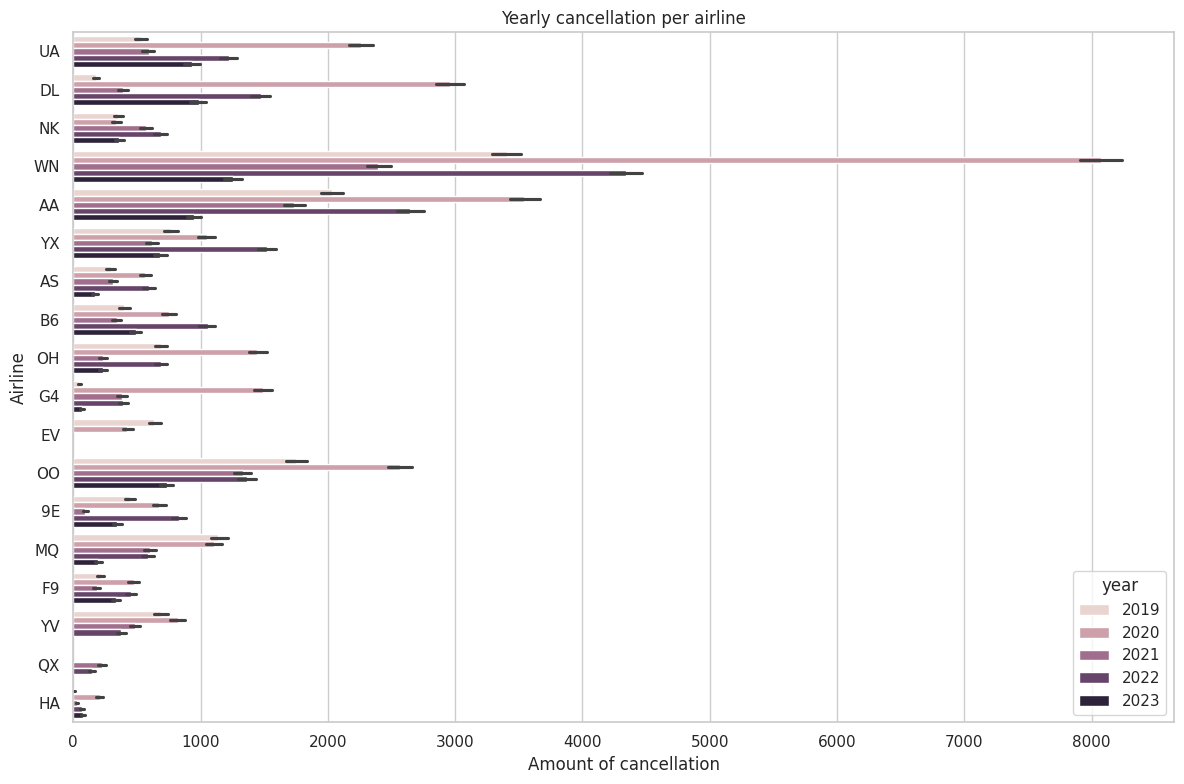

In [ ]:
# Configuration de Seaborn et création du graphique
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Création du graphique en barres horizontales
ax = sns.barplot(data=df,x='CANCELLED', y='AIRLINE_CODE', estimator="sum", hue='year', orient='h')
# ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Yearly cancellation per airline')
plt.xlabel('Amount of cancellation')
plt.ylabel('Airline')
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
yearly_delay_dep_per_airline_companies = df.pivot_table(
     index="AIRLINE_CODE" ,
    columns= ["year"],
    aggfunc="sum" )["ARR_DELAY"]
yearly_cancellation_per_airline_companies

<ipython-input-29-bdbac11346e6>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  yearly_delay_dep_per_airline_companies = df.pivot_table(


year            2019    2020    2021    2022    2023
AIRLINE_CODE                                        
9E             449.0   677.0    94.0   831.0   343.0
AA            2031.0  3545.0  1737.0  2647.0   947.0
AS             293.0   566.0   311.0   594.0   170.0
B6             399.0   754.0   341.0  1055.0   490.0
DL             179.0  2957.0   389.0  1472.0   985.0
EV             636.0   426.0     NaN     NaN     NaN
F9             217.0   474.0   186.0   452.0   337.0
G4              48.0  1488.0   385.0   392.0    70.0
HA               8.0   207.0    30.0    68.0    75.0
MQ            1139.0  1107.0   601.0   589.0   197.0
NK             354.0   339.0   570.0   686.0   363.0
OH             692.0  1447.0   236.0   693.0   233.0
OO            1749.0  2568.0  1332.0  1363.0   733.0
QX               NaN     NaN   225.0   149.0     NaN
UA             533.0  2260.0   593.0  1220.0   930.0
WN            3405.0  8072.0  2395.0  4340.0  1253.0
YV             691.0   820.0   485.0   377.0     NaN
YX             771.0  1050.0   622.0  1520.0   683.0

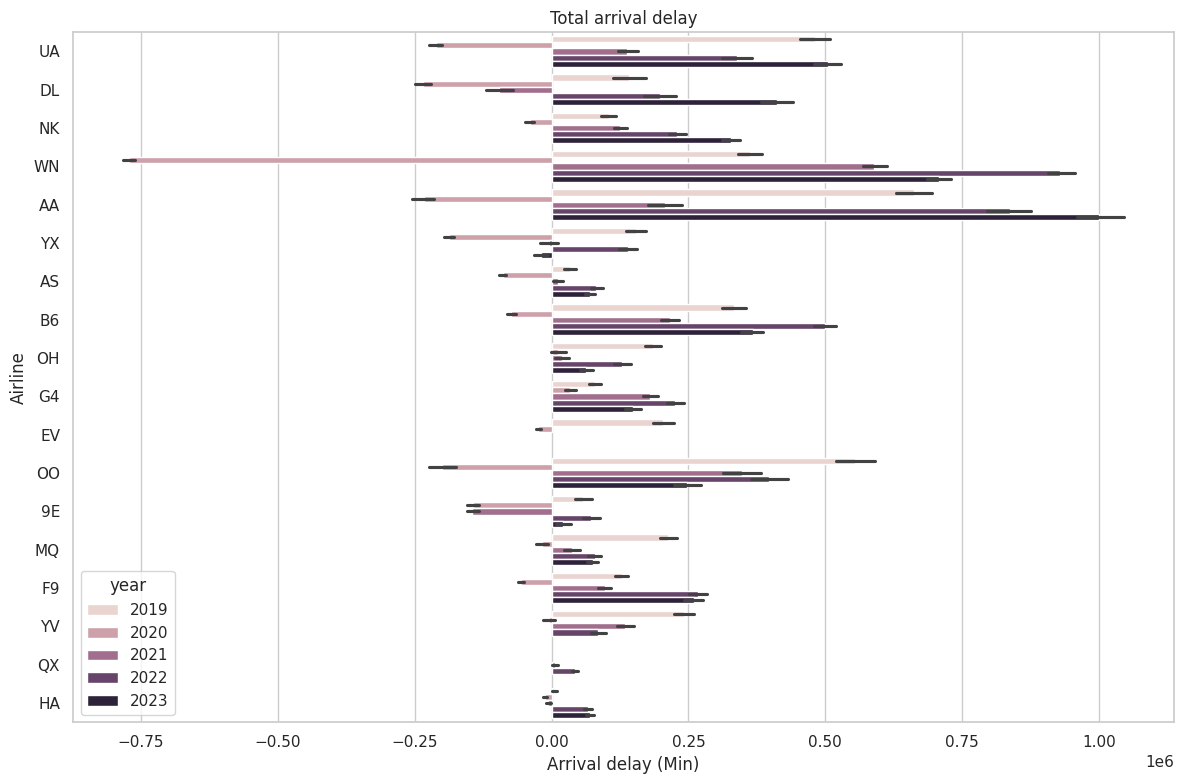

In [ ]:
# Configuration de Seaborn et création du graphique
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Création du graphique en barres horizontales
ax = sns.barplot(data=df,x='ARR_DELAY', y='AIRLINE_CODE', estimator="sum", hue='year', orient='h')
# ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Total arrival delay')
plt.xlabel('Arrival delay (Min)')
plt.ylabel('Airline')
plt.tight_layout()

# Affichage du graphique
plt.show()

In [ ]:
yearly_delay_dep_per_airline_companies = df.pivot_table(
     index="AIRLINE_CODE" ,
    columns= ["year"],
    aggfunc="sum" )["DEP_DELAY"]
yearly_cancellation_per_airline_companies

<ipython-input-31-da409357ea90>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  yearly_delay_dep_per_airline_companies = df.pivot_table(


year            2019    2020    2021    2022    2023
AIRLINE_CODE                                        
9E             449.0   677.0    94.0   831.0   343.0
AA            2031.0  3545.0  1737.0  2647.0   947.0
AS             293.0   566.0   311.0   594.0   170.0
B6             399.0   754.0   341.0  1055.0   490.0
DL             179.0  2957.0   389.0  1472.0   985.0
EV             636.0   426.0     NaN     NaN     NaN
F9             217.0   474.0   186.0   452.0   337.0
G4              48.0  1488.0   385.0   392.0    70.0
HA               8.0   207.0    30.0    68.0    75.0
MQ            1139.0  1107.0   601.0   589.0   197.0
NK             354.0   339.0   570.0   686.0   363.0
OH             692.0  1447.0   236.0   693.0   233.0
OO            1749.0  2568.0  1332.0  1363.0   733.0
QX               NaN     NaN   225.0   149.0     NaN
UA             533.0  2260.0   593.0  1220.0   930.0
WN            3405.0  8072.0  2395.0  4340.0  1253.0
YV             691.0   820.0   485.0   377.0     NaN
YX             771.0  1050.0   622.0  1520.0   683.0

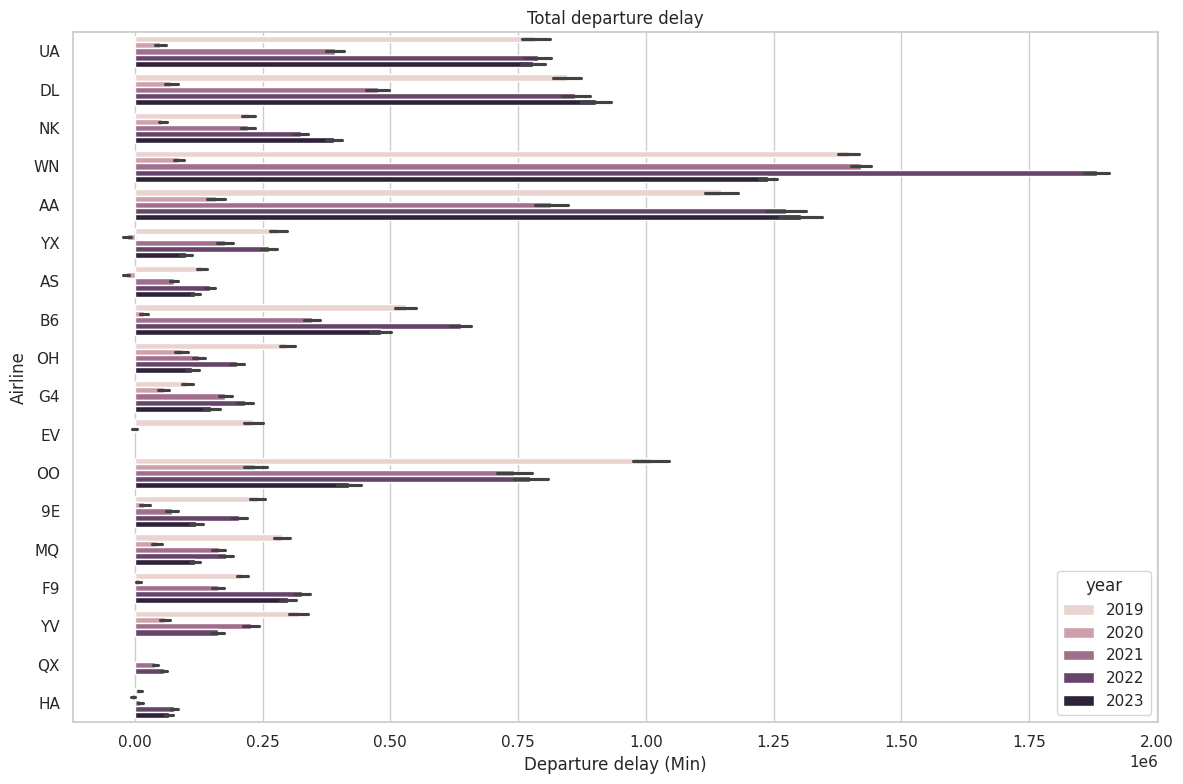

In [ ]:
# Configuration de Seaborn et création du graphique
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Création du graphique en barres horizontales
ax = sns.barplot(data=df,x='DEP_DELAY', y='AIRLINE_CODE', estimator="sum", hue='year', orient='h')
# ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Total departure delay')
plt.xlabel('Departure delay (Min)')
plt.ylabel('Airline')
plt.tight_layout()

# Affichage du graphique
plt.show()